In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import random, re
import time

# used to supress display of warnings
import warnings

# import missingno as mno

# nlp libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from tqdm import tqdm
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer

import holoviews as hv
from holoviews import opts

import os;
from os import makedirs

# sampling methods
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# import zscore for scaling the data
from scipy.stats import zscore

from scipy.stats import randint as sp_randint

# save models
import pickle

# pre-processing methods
from sklearn.model_selection import train_test_split

# the classification models 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# methods and classes for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score

# cross-validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# feature selection methods
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# pre-processing methods
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

# Deep learning libraries
from keras.utils import np_utils
from keras.utils import plot_model
from keras.layers import Input
# from keras.layers.merge import Concatenate
from keras.layers import concatenate

from keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.models import Model
from tensorflow.keras.layers import Flatten, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from keras.models import model_from_json
from keras.regularizers import l1, l2, l1_l2
from keras.constraints import maxnorm, min_max_norm
from keras.constraints import unit_norm
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json

from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier

# Keras pre-processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:1002)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:1002)>
2024-01-25 00:48:37.168689: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Import necessary libraries
import pandas as pd

# Load the data into a Pandas DataFrame
data = pd.read_csv('Data Set - industrial_safety_and_health_database_with_accidents_description.csv')  # Replace 'your_data_file.csv' with the actual file path

# Display the first few rows to check the import
print(data.head())

   Unnamed: 0                Data   Countries     Local Industry Sector  \
0           0  2016-01-01 0:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 0:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 0:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 0:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 0:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk                                        Description  
0              Pressed

No null values, no cleaning/removing the data for null specific exceptations

In [3]:
data.info()

print("\n Number of rows = {0} and Number of Columns = {1} in the Data frame".format(data.shape[0], data.shape[1]))
print("\n Null values count for the column = {0} \n", data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.7+ KB

 Number of rows = 425 and Number of Columns = 11 in the Data frame

 Null values count for the column = {0} 
 Unnamed: 0                  0


In [4]:
data.head(5)

Unnamed: 0                Data   Countries     Local Industry Sector  \
0           0  2016-01-01 0:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 0:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 0:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 0:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 0:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk                                        Description  
0              Pressed  While removing the drill rod of the Jumbo 08 f...  
1  Pressurized Systems  During the activation of a sodium sulphide pum...  
2         Manual Tools  In the sub-station MILPO located at level +170...  
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...  
4               Others  Approximately at 11:45 a.m. in circumstances t...

In [5]:
print("Colums and they datatypes")
data.dtypes

Colums and they datatypes


Unnamed: 0                   int64
Data                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Genre                       object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object

No null values 

In [6]:
# dropping the Unnamed: 0 
# Renaming the columns of Genre to Gender and Data to Date
data.drop(labels='Unnamed: 0',axis=1,inplace=True)
data.rename(columns={"Genre": "Gender", "Data": "Date", "Countries": "Country", 'Employee or Third Party':'Employee type'}, inplace=True)
# Converting the Date field to datetime
data['Date']= pd.to_datetime(data['Date']) 

In [7]:
# Handle missing values (if any)
# For example, if 'Description' has missing values, you can replace them with 'Not available'
data['Description'].fillna('Not available', inplace=True)

print(data.isnull().sum())

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
dtype: int64


In [8]:
data.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

In [9]:
# Check data types
print(data.dtypes)

Date                        datetime64[ns]
Country                             object
Local                               object
Industry Sector                     object
Accident Level                      object
Potential Accident Level            object
Gender                              object
Employee type                       object
Critical Risk                       object
Description                         object
dtype: object


In [10]:
data.describe()

Date
count                            425
mean   2016-09-20 16:46:18.352941312
min              2016-01-01 00:00:00
25%              2016-05-01 00:00:00
50%              2016-09-13 00:00:00
75%              2017-02-08 00:00:00
max              2017-07-09 00:00:00

In [11]:
data.shape

(425, 10)

In [12]:
data.duplicated().sum()

7

There are about 425 rows and 11 columns in the dataset.

We noticed that except a 'date' column all other columns are categorical columns

In [13]:
# Delete duplicate rows
data.drop_duplicates(inplace=True)
data.shape
# 7 rows are dropped

(418, 10)

In [14]:
# View the duplicate records
duplicates = data.duplicated()

data[duplicates]
# Will return no values as duplicates are deleted

Empty DataFrame
Columns: [Date, Country, Local, Industry Sector, Accident Level, Potential Accident Level, Gender, Employee type, Critical Risk, Description]
Index: []

In [15]:
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data['day'] = pd.DatetimeIndex(data['Date']).day
data.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  year  month  day  
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1  
1  During the activation of a sodium sulphide pum...  2016      1    2  
2  In the sub-station MILPO located at level +170...  2016      1    6  
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8  
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10

In [16]:
print("After removing the duplicatesNumber of rows = {0} and Number of Columns = {1}.".format(data.shape[0], data.shape[1]))


After removing the duplicatesNumber of rows = 418 and Number of Columns = 13.


In [17]:
# Check unique values of all columns except 'Description' column
for x in data.columns:
    if x != 'Description':
      print('--'*30); print(f'Unique values of "{x}" column');
      print(data[x].unique())
      print('**'*30);print('length::', len(data[x].unique()));print('--'*30);
      print('\n\n')


------------------------------------------------------------
Unique values of "Date" column
<DatetimeArray>
['2016-01-01 00:00:00', '2016-01-02 00:00:00', '2016-01-06 00:00:00',
 '2016-01-08 00:00:00', '2016-01-10 00:00:00', '2016-01-12 00:00:00',
 '2016-01-16 00:00:00', '2016-01-17 00:00:00', '2016-01-19 00:00:00',
 '2016-01-26 00:00:00',
 ...
 '2017-06-24 00:00:00', '2017-06-20 00:00:00', '2017-06-23 00:00:00',
 '2017-06-19 00:00:00', '2017-06-22 00:00:00', '2017-06-29 00:00:00',
 '2017-07-04 00:00:00', '2017-07-05 00:00:00', '2017-07-06 00:00:00',
 '2017-07-09 00:00:00']
Length: 287, dtype: datetime64[ns]
************************************************************
length:: 287
------------------------------------------------------------



------------------------------------------------------------
Unique values of "Country" column
['Country_01' 'Country_02' 'Country_03']
************************************************************
length:: 3
--------------------------------------

#### Check Outliers

Observation:
* Looks like the Accidents happened between 2016 and 2017
* 33 Types of critical Risks
* 3 types of Employee Types
* Accident happened for both Male and Female
* Accident levels are I to V 
* Potential Accident Levels are six I to VI
* There are three industry sectors 
* Local has 12 
* Accidents happen in three different countries
* Accident happen on 287 different dates and time


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 424
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      418 non-null    datetime64[ns]
 1   Country                   418 non-null    object        
 2   Local                     418 non-null    object        
 3   Industry Sector           418 non-null    object        
 4   Accident Level            418 non-null    object        
 5   Potential Accident Level  418 non-null    object        
 6   Gender                    418 non-null    object        
 7   Employee type             418 non-null    object        
 8   Critical Risk             418 non-null    object        
 9   Description               418 non-null    object        
 10  year                      418 non-null    int32         
 11  month                     418 non-null    int32         
 12  day                       4

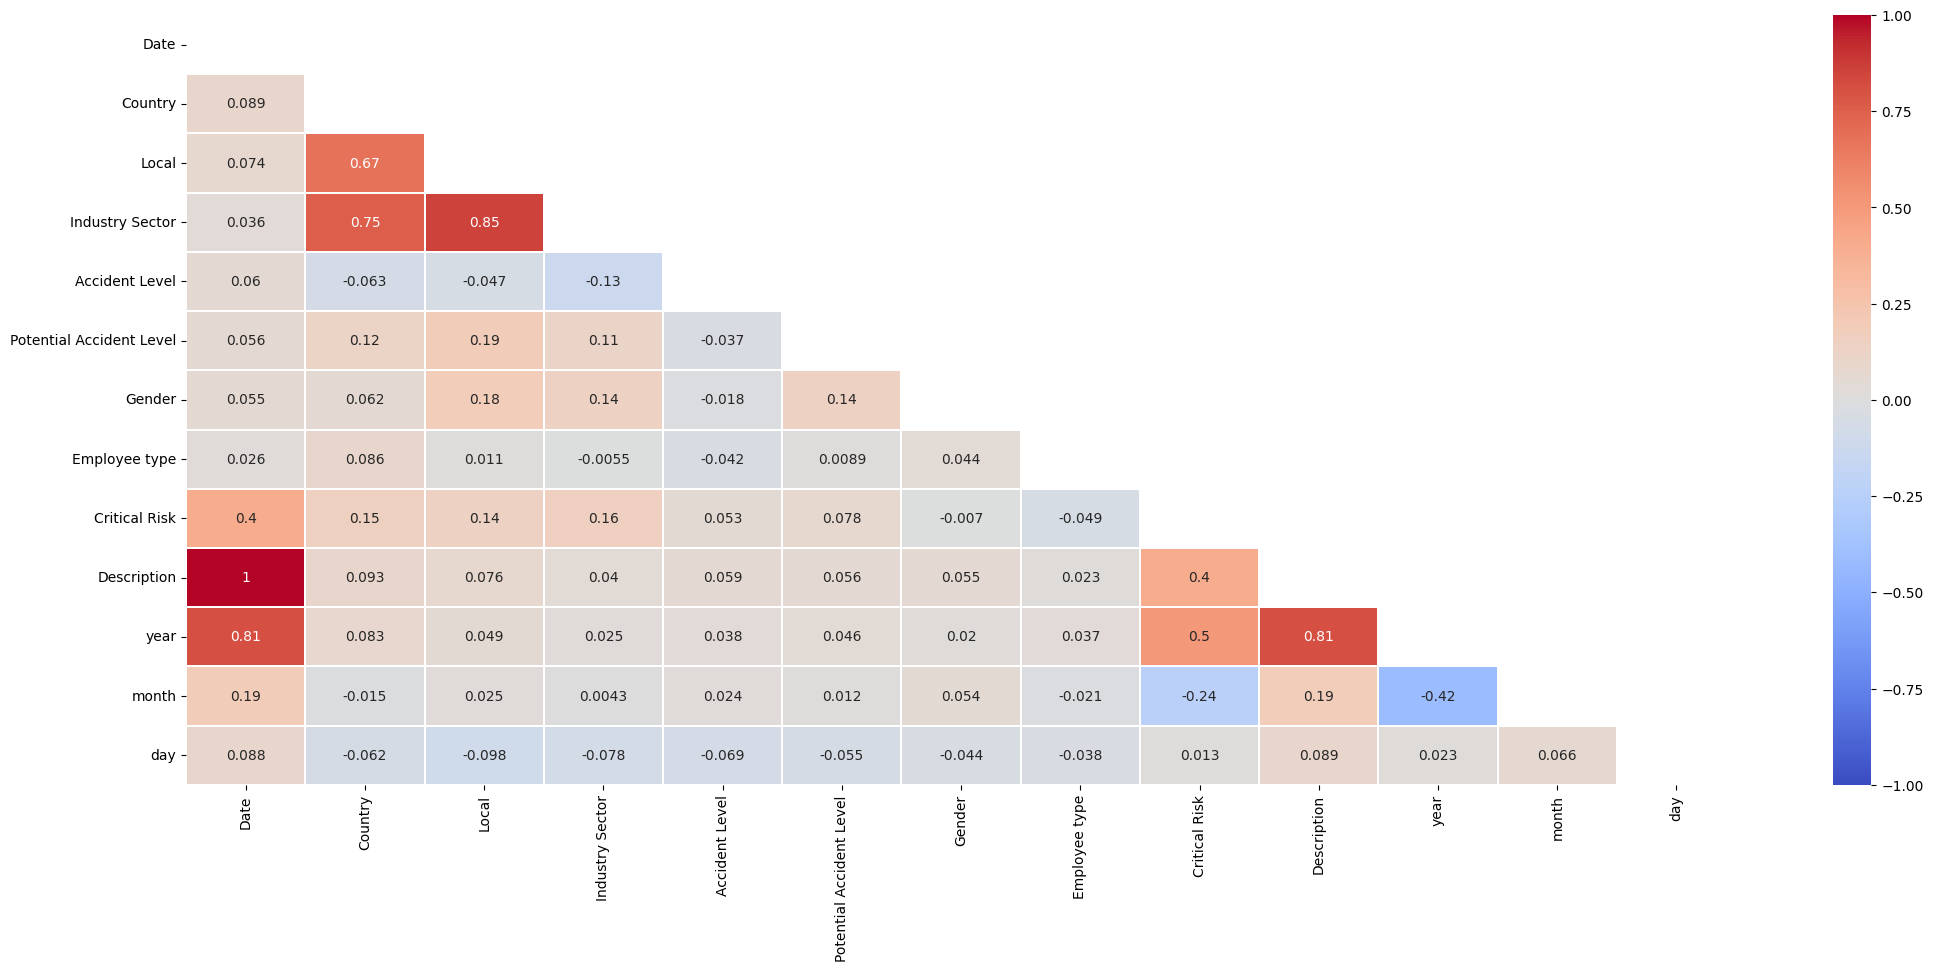

In [19]:
import numpy as np

plt.figure(5, figsize=(25, 10))
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)


Data Cleaning:
* Checked for the null values
* Removed the duplicates
* Renamed the columns of Genre, Data, Countries, Employee or Third Party
* Datatype of Date changed to Datetime

* Major critical risk counts are others followed by Pressed 

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


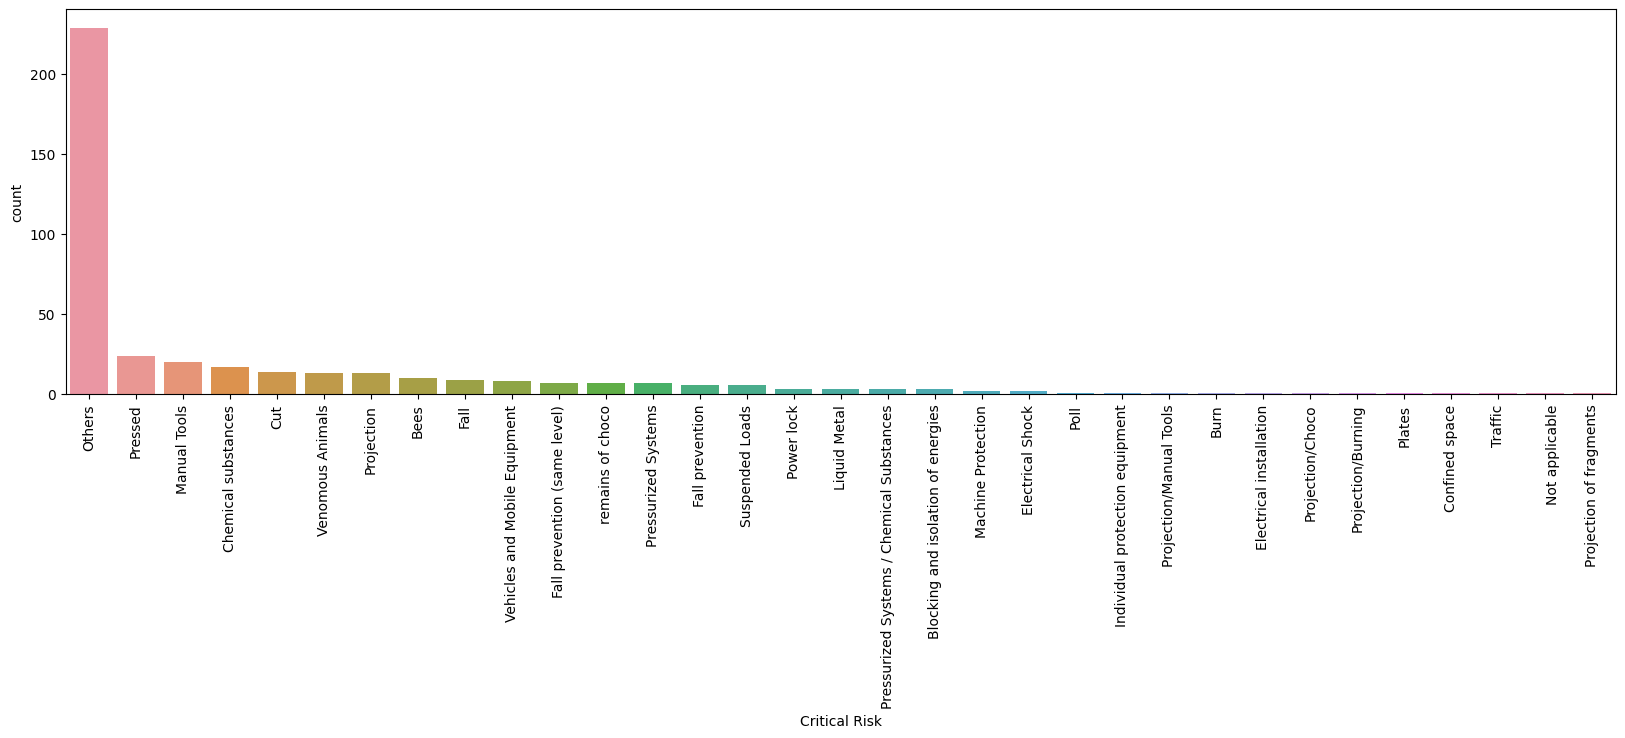

In [20]:
plt.figure(figsize=(20,5))
descending_order = data['Critical Risk'].value_counts().sort_values(ascending=False).index
sns.countplot(x=data['Critical Risk'],order=descending_order)
plt.xticks(rotation = 'vertical')
plt.show()


Majority accidents occurred in Country_1
* 59% accidents occurred in Country_01
* 31% accidents occurred in Country_02
* 10% accidents occurred in Country_03


------------------------------------------------------------
Value Counts for `Country` label
------------------------------------------------------------
Index(['Date', 'Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee type', 'Critical Risk',
       'Description', 'year', 'month', 'day'],
      dtype='object')
Country_01 count: 248 i.e. 59.0%
Country_02 count: 129 i.e. 31.0%
Country_03 count: 41 i.e. 10.0%
------------------------------------------------------------
Distributon of `Country` label
------------------------------------------------------------


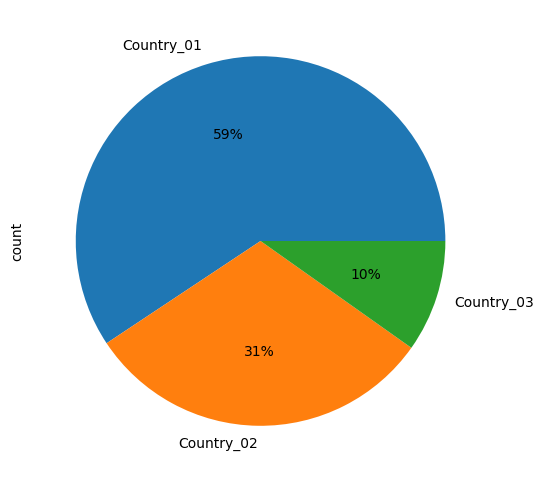

In [21]:
print('--'*30); print('Value Counts for `Country` label'); print('--'*30)

print(data.columns)

total_row_cnt = data.shape[0]
country_01_cnt = data[data.Country == 'Country_01'].shape[0]
country_02_cnt = data[data.Country == 'Country_02'].shape[0]
country_03_cnt = data[data.Country == 'Country_03'].shape[0]

print(f'Country_01 count: {country_01_cnt} i.e. {round(country_01_cnt/total_row_cnt*100, 0)}%')
print(f'Country_02 count: {country_02_cnt} i.e. {round(country_02_cnt/total_row_cnt*100, 0)}%')
print(f'Country_03 count: {country_03_cnt} i.e. {round(country_03_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Country` label'); print('--'*30)
_ = data['Country'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Country_01', 'Country_02', 'Country_03'], figsize = (10, 6))


 * Local_03 has the more plants 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
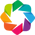

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Bars   [Local]   (proportion)

In [22]:
local_cnt = np.round(data['Local'].value_counts(normalize=True) * 100)

hv.extension('bokeh')
hv.Bars(local_cnt).opts(title="Local Count", color="#8888ff", xlabel="Locals", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=700, height=300,tools=['hover'],show_grid=True))


* 57% manufacturing plants belongs to Mining sector.
* 32% manufacturing plants belongs to Metals sector.
* 11% manufacturing plants belongs to Others sector.


In [23]:
print('--'*30); print('Value Counts for `Industry Sector` label'); print('--'*30)

Mining_cnt = data[data['Industry Sector'] == 'Mining'].shape[0]
Metals_cnt = data[data['Industry Sector'] == 'Metals'].shape[0]
Others_cnt = data[data['Industry Sector'] == 'Others'].shape[0]

print(f'Mining count: {Mining_cnt} i.e. {round(Mining_cnt/total_row_cnt*100, 0)}%')
print(f'Metals count: {Metals_cnt} i.e. {round(Metals_cnt/total_row_cnt*100, 0)}%')
print(f'Others count: {Others_cnt} i.e. {round(Others_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Industry Sector` label'); print('--'*30)

sector_cnt = np.round(data['Industry Sector'].value_counts(normalize=True) * 100)

hv.Bars(sector_cnt).opts(title="Industry Sector Count", color="#8888ff", xlabel="Sectors", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=500, height=300,tools=['hover'],show_grid=True))\
                * hv.Text('Mining', 15, f"{int(sector_cnt.loc['Mining'])}%")\
                * hv.Text('Metals', 15, f"{int(sector_cnt.loc['Metals'])}%")\
                * hv.Text('Others', 15, f"{int(sector_cnt.loc['Others'])}%")


------------------------------------------------------------
Value Counts for `Industry Sector` label
------------------------------------------------------------
Mining count: 237 i.e. 57.0%
Metals count: 134 i.e. 32.0%
Others count: 47 i.e. 11.0%
------------------------------------------------------------
Distributon of `Industry Sector` label
------------------------------------------------------------


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Overlay
   .Bars.I   :Bars   [Industry Sector]   (proportion)
   .Text.I   :Text   [x,y]
   .Text.II  :Text   [x,y]
   .Text.III :Text   [x,y]

* The number of accidents decreases as the Accident Level increases.
* The number of accidents increases as the Potential Accident Level increases.

In [24]:
print('--'*30); print('Value Counts for `Accident Level` label'); print('--'*40)

I_acc_cnt = data[data['Accident Level'] == 'I'].shape[0]
II_acc_cnt = data[data['Accident Level'] == 'II'].shape[0]
III_acc_cnt = data[data['Accident Level'] == 'III'].shape[0]
IV_acc_cnt = data[data['Accident Level'] == 'IV'].shape[0]
V_acc_cnt = data[data['Accident Level'] == 'V'].shape[0]
VI_acc_cnt = data[data['Accident Level'] == 'VI'].shape[0]

print(f'Accident Level - I count: {I_acc_cnt} i.e. {round(I_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - II count: {II_acc_cnt} i.e. {round(II_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - III count: {III_acc_cnt} i.e. {round(III_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - IV count: {IV_acc_cnt} i.e. {round(IV_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - V count: {V_acc_cnt} i.e. {round(V_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - VI count: {VI_acc_cnt} i.e. {round(VI_acc_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Value Counts for `Potential Accident Level'); print('--'*40)

I_pot_acc_cnt = data[data['Potential Accident Level'] == 'I'].shape[0]
II_pot_acc_cnt = data[data['Potential Accident Level'] == 'II'].shape[0]
III_pot_acc_cnt = data[data['Potential Accident Level'] == 'III'].shape[0]
IV_pot_acc_cnt = data[data['Potential Accident Level'] == 'IV'].shape[0]
V_pot_acc_cnt = data[data['Potential Accident Level'] == 'V'].shape[0]
VI_pot_acc_cnt = data[data['Potential Accident Level'] == 'VI'].shape[0]

print(f'Potential Accident Level - I count: {I_pot_acc_cnt} i.e. {round(I_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - II count: {II_pot_acc_cnt} i.e. {round(II_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - III count: {III_pot_acc_cnt} i.e. {round(III_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - IV count: {IV_pot_acc_cnt} i.e. {round(IV_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - V count: {V_pot_acc_cnt} i.e. {round(V_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - VI count: {VI_pot_acc_cnt} i.e. {round(VI_pot_acc_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Accident Level` & `Potential Accident Level` label'); print('--'*40)

ac_level_cnt = np.round(data['Accident Level'].value_counts(normalize=True) * 100)
pot_ac_level_cnt = np.round(data['Potential Accident Level'].value_counts(normalize=True) * 100, decimals=1)
ac_pot = pd.concat([ac_level_cnt, pot_ac_level_cnt], axis=1,sort=False).fillna(0).rename(columns={'Accident Level':'Accident', 'Potential Accident Level':'Potential'})
ac_pot = pd.melt(ac_pot.reset_index(), ['index']).rename(columns={'index':'Severity', 'variable':'Levels'})

hv.Bars(ac_pot, ['Severity', 'Levels'], 'value').opts(opts.Bars(title="Accident Levels Count", width=700, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=45, ylabel="Percentage", yformatter='%d%%'))


------------------------------------------------------------
Value Counts for `Accident Level` label
--------------------------------------------------------------------------------
Accident Level - I count: 309 i.e. 74.0%
Accident Level - II count: 40 i.e. 10.0%
Accident Level - III count: 31 i.e. 7.0%
Accident Level - IV count: 30 i.e. 7.0%
Accident Level - V count: 8 i.e. 2.0%
Accident Level - VI count: 0 i.e. 0.0%
------------------------------------------------------------
Value Counts for `Potential Accident Level
--------------------------------------------------------------------------------
Potential Accident Level - I count: 45 i.e. 11.0%
Potential Accident Level - II count: 95 i.e. 23.0%
Potential Accident Level - III count: 106 i.e. 25.0%
Potential Accident Level - IV count: 141 i.e. 34.0%
Potential Accident Level - V count: 30 i.e. 7.0%
Potential Accident Level - VI count: 1 i.e. 0.0%
------------------------------------------------------------
Distributon of `Accident Lev

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

:Bars   [Severity,Levels]   (value)

In [25]:
print('--'*30); print('Value Counts for `Employee type` label'); print('--'*30)

third_party_cnt = data[data['Employee type'] == 'Third Party'].shape[0]
emp_cnt = data[data['Employee type'] == 'Employee'].shape[0]
third_rem_cnt = data[data['Employee type'] == 'Third Party (Remote)'].shape[0]

print(f'Third Party count: {third_party_cnt} i.e. {round(third_party_cnt/total_row_cnt*100, 0)}%')
print(f'Employee count: {emp_cnt} i.e. {round(emp_cnt/total_row_cnt*100, 0)}%')
print(f'Third Party (Remote) count: {third_rem_cnt} i.e. {round(third_rem_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Employee type` label'); print('--'*30)

emp_type_cnt = np.round(data['Employee type'].value_counts(normalize=True) * 100)

hv.Bars(emp_type_cnt).opts(title="Employee type Count", color="#8888ff", xlabel="Employee Type", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=500, height=300,tools=['hover'],show_grid=True))


------------------------------------------------------------
Value Counts for `Employee type` label
------------------------------------------------------------
Third Party count: 185 i.e. 44.0%
Employee count: 178 i.e. 43.0%
Third Party (Remote) count: 55 i.e. 13.0%
------------------------------------------------------------
Distributon of `Employee type` label
------------------------------------------------------------


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Bars   [Employee type]   (proportion)

In [26]:
print('--'*30); print('Value Counts for `Gender` label'); print('--'*30)

Male_cnt = data[data['Gender'] == 'Male'].shape[0]
Female_cnt = data[data['Gender'] == 'Female'].shape[0]

print(f'Male count: {Male_cnt} i.e. {round(Male_cnt/total_row_cnt*100, 0)}%')
print(f'Female count: {Female_cnt} i.e. {round(Female_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Gender` label'); print('--'*30)

gender_cnt = np.round(data['Gender'].value_counts(normalize=True) * 100)

hv.Bars(gender_cnt).opts(title="Gender Count", color="#8888ff", xlabel="Gender", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=500, height=300,tools=['hover'],show_grid=True))


------------------------------------------------------------
Value Counts for `Gender` label
------------------------------------------------------------
Male count: 396 i.e. 95.0%
Female count: 22 i.e. 5.0%
------------------------------------------------------------
Distributon of `Gender` label
------------------------------------------------------------


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Bars   [Gender]   (proportion)

Because most part of the Critical Risks are classified as 'Others', it is thought that there are too many risks to classify precisely.

And it is also thought that it takes so much time to analyze risks and reasons why the accidents occur.



In [27]:
cr_risk_cnt = np.round(data['Critical Risk'].value_counts(normalize=True) * 100)

hv.Bars(cr_risk_cnt[::-1]).opts(title="Critical Risk Count", color="#8888ff", xlabel="Critical Risks", ylabel="Percentage", xformatter='%d%%')\
                .opts(opts.Bars(width=600, height=600,tools=['hover'],show_grid=True,invert_axes=True))


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Bars   [Critical Risk]   (proportion)

* Accidents are more recorded from Feb to June, 
* there are high number of accidents in 2016 and less in 2017.
* Number of accidents are high in beginning of the year and it keeps decreasing later.


In [28]:
year_cnt = np.round(data['year'].value_counts(normalize=True,sort=False) * 100)
year = hv.Bars(year_cnt).opts(title="Year Count", color="yellow", xlabel="Years")

month_cnt = np.round(data['month'].value_counts(normalize=True,sort=False) * 100)
month = hv.Bars(month_cnt).opts(title="Month Count", color="#8888ff", xlabel="Months") * hv.Curve(month_cnt).opts(color='red', line_width=3)

(year + month).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(2)


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Layout
   .Bars.I    :Bars   [year]   (proportion)
   .Overlay.I :Overlay
      .Bars.I  :Bars   [month]   (proportion)
      .Curve.I :Curve   [month]   (proportion)

In [29]:
data.head(5)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  year  month  day  
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1  
1  During the activation of a sodium sulphide pum...  2016      1    2  
2  In the sub-station MILPO located at level +170...  2016      1    6  
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8  
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10

In [30]:
day_cnt = np.round(data['day'].value_counts(normalize=True,sort=False) * 100)
hv.Bars(day_cnt).opts(title="Day Count", color="#8888ff", xlabel="Days") * hv.Curve(day_cnt).opts(width=500, height=300, color='red', line_width=3)


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Overlay
   .Bars.I  :Bars   [day]   (proportion)
   .Curve.I :Curve   [day]   (proportion)

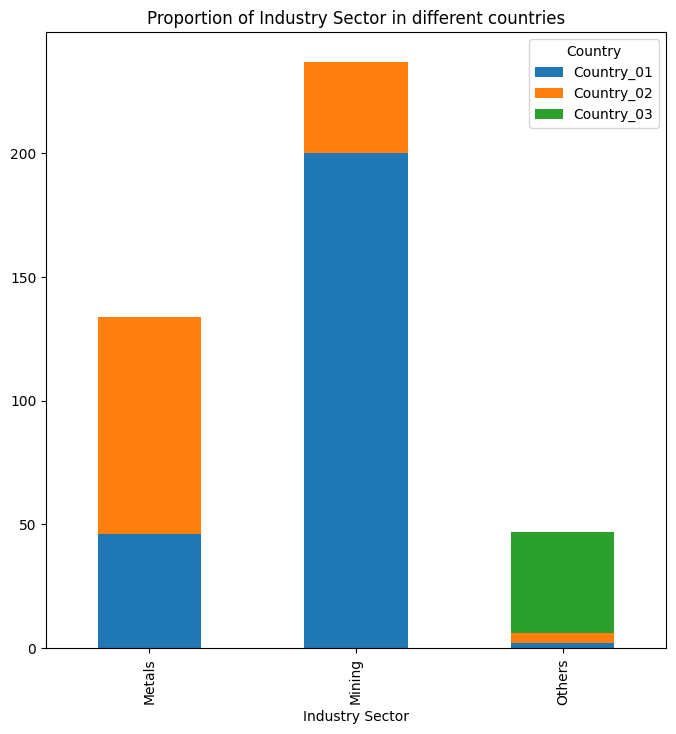

In [31]:
# Check the proportion of Industry sector in different countries
indsec_cntry_table = pd.crosstab(index = data['Industry Sector'], columns = data['Country'])
indsec_cntry_table.plot(kind = 'bar', figsize=(8,8), stacked = True)
plt.title("Proportion of Industry Sector in different countries")
plt.show()


* Metals Manufaturing are in only in country_01 and country_02 - Majority are Country_02
* Mining Manufaturing are in only in country_01 and country_02 - Majority are Country_01
* Others category has all three countries


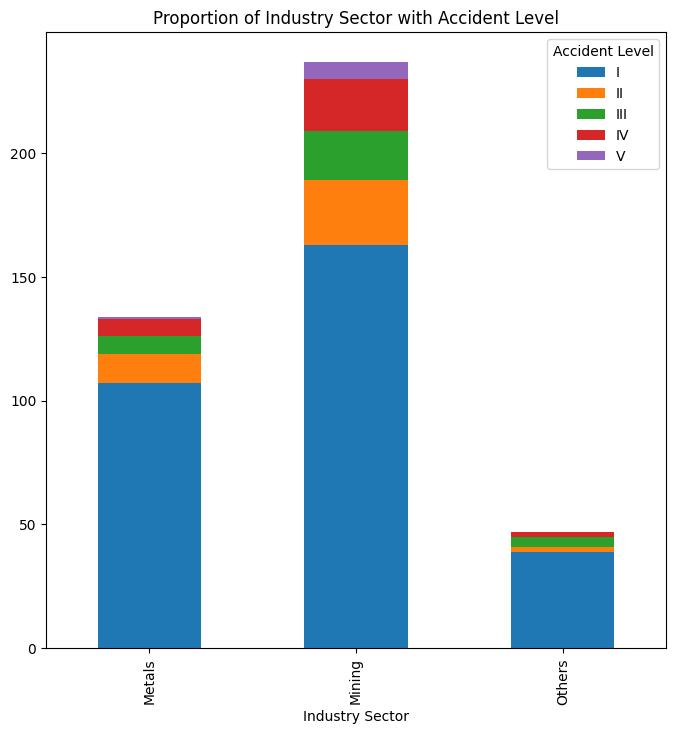

In [32]:
# Check the proportion of Industry sector in different countries
indsec_cntry_table = pd.crosstab(index = data['Industry Sector'], columns = data['Accident Level'])
indsec_cntry_table.plot(kind = 'bar', figsize=(8,8), stacked = True)
plt.title("Proportion of Industry Sector with Accident Level")
plt.show()


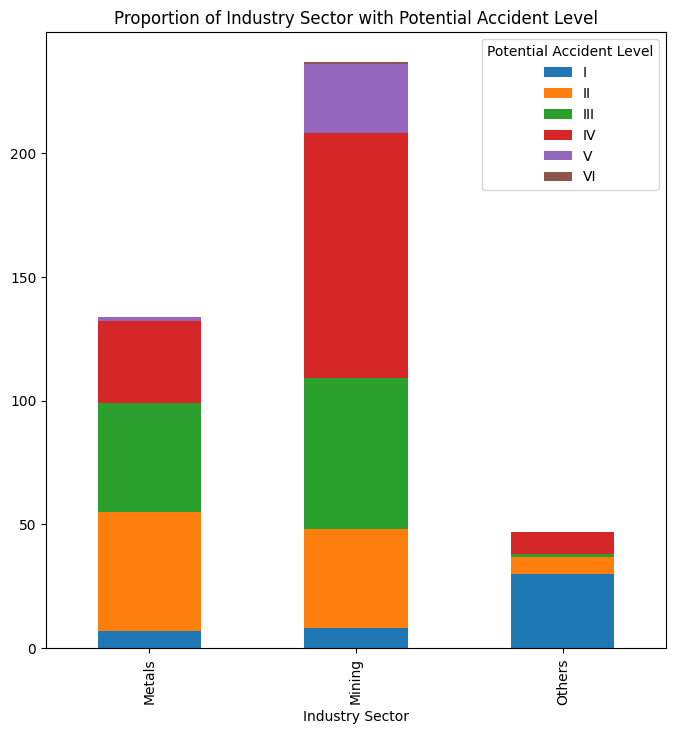

In [33]:
# Check the proportion of Industry sector in different countries
indsec_cntry_table = pd.crosstab(index = data['Industry Sector'], columns = data['Potential Accident Level'])
indsec_cntry_table.plot(kind = 'bar', figsize=(8,8), stacked = True)
plt.title("Proportion of Industry Sector with Potential Accident Level")
plt.show()

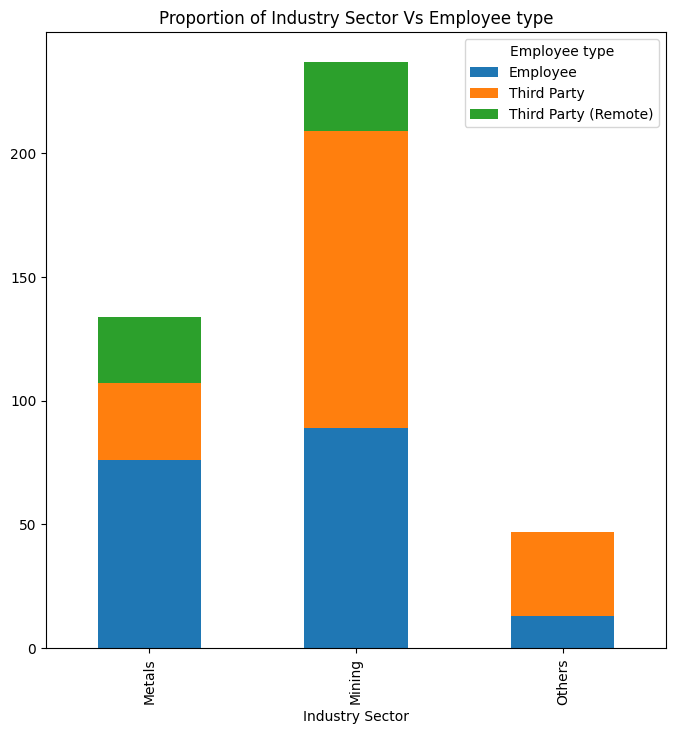

In [34]:
indsec_cntry_table = pd.crosstab(index = data['Industry Sector'], columns = data['Employee type'])
indsec_cntry_table.plot(kind = 'bar', figsize=(8,8), stacked = True)
plt.title("Proportion of Industry Sector Vs Employee type")
plt.show()

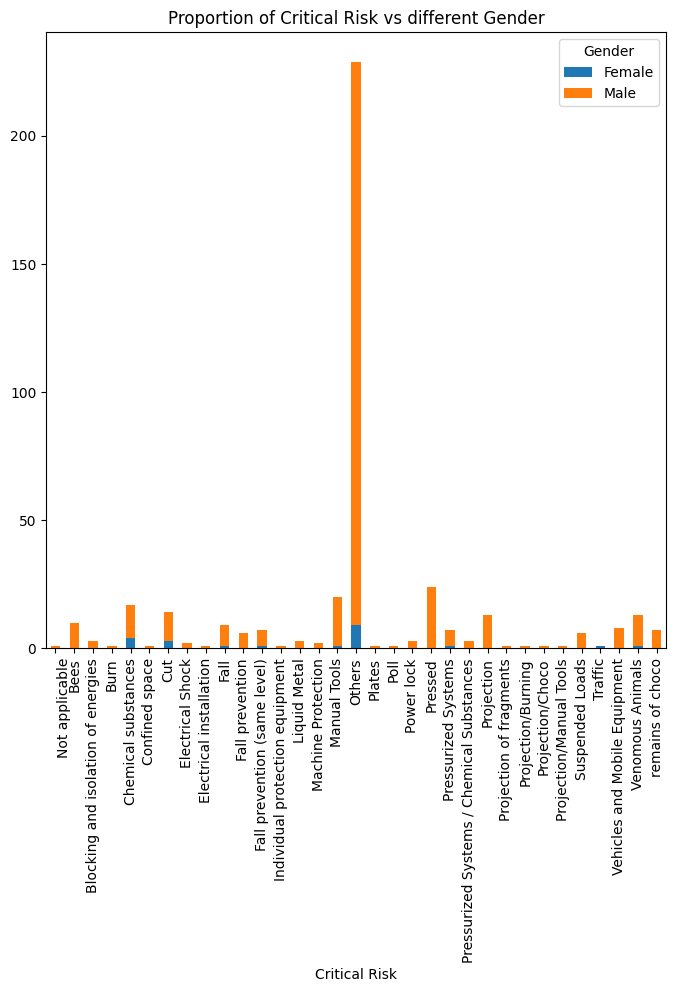

In [35]:
indsec_cntry_table = pd.crosstab(index = data['Critical Risk'], columns = data['Gender'])
indsec_cntry_table.plot(kind = 'bar', figsize=(8,8), stacked = True)
plt.title("Proportion of Critical Risk vs different Gender")
plt.show()

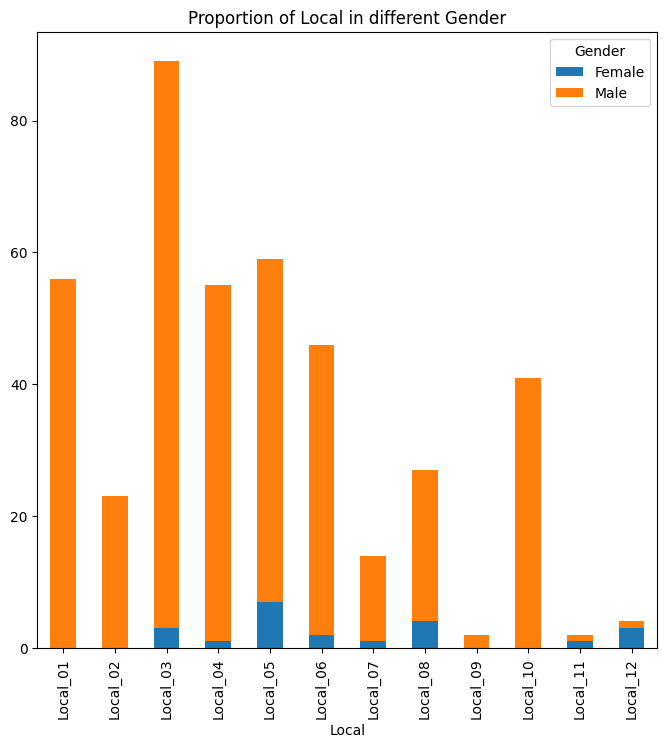

In [36]:
indsec_cntry_table = pd.crosstab(index = data['Local'], columns = data['Gender'])
indsec_cntry_table.plot(kind = 'bar', figsize=(8,8), stacked = True)
plt.title("Proportion of Local in different Gender")
plt.show()

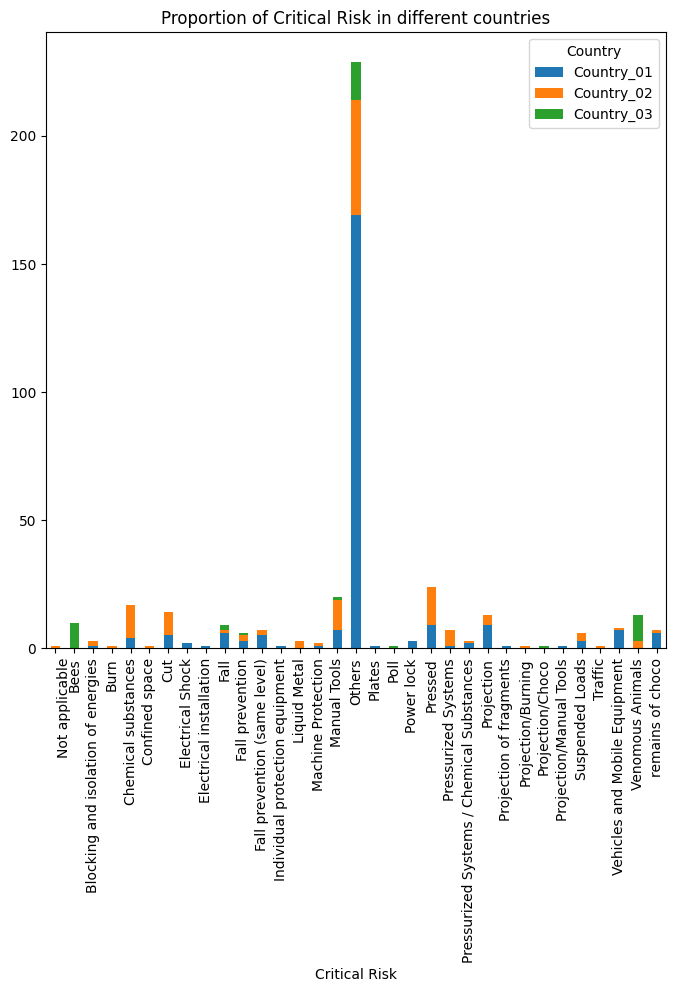

In [37]:
indsec_cntry_table = pd.crosstab(index = data['Critical Risk'], columns = data['Country'])
indsec_cntry_table.plot(kind = 'bar', figsize=(8,8), stacked = True)
plt.title("Proportion of Critical Risk in different countries")
plt.show()

In [38]:
data.head(4)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   

                                         Description  year  month  day  
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1  
1  During the activation of a sodium sulphide pum...  2016      1    2  
2  In the sub-station MILPO located at level +170...  2016      1    6  
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8

In [39]:
f = lambda x : np.round(x/x.sum() * 100)
em_gen = data.groupby(['Gender','Employee type'])['Employee type'].count().unstack().apply(f, axis=1)

hv.Bars(pd.melt(em_gen.reset_index(), ['Gender']), ['Gender','Employee type'], 'value').opts(opts.Bars(title="Employee type by Gender Count", width=800, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

:Bars   [Gender,Employee type]   (value)

In [40]:
f = lambda x : np.round(x/x.sum() * 100)

ac_gen = data.groupby(['Gender','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1)
ac = hv.Bars(pd.melt(ac_gen.reset_index(), ['Gender']), ['Gender','Accident Level'], 'value').opts(opts.Bars(title="Accident Level by Gender Count"))

pot_ac_gen = data.groupby(['Gender','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1)
pot_ac = hv.Bars(pd.melt(pot_ac_gen.reset_index(), ['Gender']), ['Gender','Potential Accident Level'], 'value').opts(opts.Bars(title="Potential Accident Level by Gender Count"))

(ac + pot_ac).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,xrotation=0, ylabel="", yformatter='%d%%'))


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and

:Layout
   .Bars.I  :Bars   [Gender,Accident Level]   (value)
   .Bars.II :Bars   [Gender,Potential Accident Level]   (value)

In [41]:
f = lambda x : np.round(x/x.sum() * 100)
em_gen = data.groupby(['Gender','Industry Sector'])['Industry Sector'].count().unstack().apply(f, axis=1)

hv.Bars(pd.melt(em_gen.reset_index(), ['Gender']), ['Gender','Industry Sector'], 'value').opts(opts.Bars(title="Industry Sector by Gender Count", width=800, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

:Bars   [Gender,Industry Sector]   (value)

In [42]:
f = lambda x : np.round(x/x.sum() * 100)

ac_gen = data.groupby(['Gender','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1)
ac = hv.Bars(pd.melt(ac_gen.reset_index(), ['Gender']), ['Gender','Accident Level'], 'value').opts(opts.Bars(title="Accident Level by Gender Count"))

pot_ac_gen = data.groupby(['Gender','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1)
pot_ac = hv.Bars(pd.melt(pot_ac_gen.reset_index(), ['Gender']), ['Gender','Potential Accident Level'], 'value').opts(opts.Bars(title="Potential Accident Level by Gender Count"))

(ac + pot_ac).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,xrotation=0, ylabel="", yformatter='%d%%'))


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and

:Layout
   .Bars.I  :Bars   [Gender,Accident Level]   (value)
   .Bars.II :Bars   [Gender,Potential Accident Level]   (value)

In [43]:
ac_em = data.groupby(['Employee type','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1)
ac = hv.Bars(pd.melt(ac_em.reset_index(), ['Employee type']), ['Employee type','Accident Level'], 'value').opts(opts.Bars(title="Accident Level by Employee type Count"))

pot_ac_em = data.groupby(['Employee type','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1)
pot_ac = hv.Bars(pd.melt(pot_ac_em.reset_index(), ['Employee type']), ['Employee type','Potential Accident Level'], 'value').opts(opts.Bars(title="Potential Accident Level by Employee type Count"))

(ac + pot_ac).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%',fontsize={'title':9}))


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and

:Layout
   .Bars.I  :Bars   [Employee type,Accident Level]   (value)
   .Bars.II :Bars   [Employee type,Potential Accident Level]   (value)

In [44]:
f = lambda x : np.round(x/x.sum() * 100)

ac_mo = data.groupby(['month','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
ac = hv.Curve(ac_mo['I'], label='I') * hv.Curve(ac_mo['II'], label='II') * hv.Curve(ac_mo['III'], label='III') * hv.Curve(ac_mo['IV'], label='IV') * hv.Curve(ac_mo['V'], label='V')\
        .opts(opts.Curve(title="Accident Level by Month Count"))

pot_ac_mo = data.groupby(['month','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
pot_ac = hv.Curve(pot_ac_mo['I'], label='I') * hv.Curve(pot_ac_mo['II'], label='II') * hv.Curve(pot_ac_mo['III'], label='III') * hv.Curve(pot_ac_mo['IV'], label='IV')\
        * hv.Curve(pot_ac_mo['V'], label='V') * hv.Curve(pot_ac_mo['VI'], label='VI').opts(opts.Curve(title="Potential Accident Level by Month Count"))
        
(ac+pot_ac).opts(opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(1)


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavi

:Layout
   .Overlay.I  :Overlay
      .Curve.I   :Curve   [month]   (I)
      .Curve.II  :Curve   [month]   (II)
      .Curve.III :Curve   [month]   (III)
      .Curve.IV  :Curve   [month]   (IV)
      .Curve.V   :Curve   [month]   (V)
   .Overlay.II :Overlay
      .Curve.I   :Curve   [month]   (I)
      .Curve.II  :Curve   [month]   (II)
      .Curve.III :Curve   [month]   (III)
      .Curve.IV  :Curve   [month]   (IV)
      .Curve.V   :Curve   [month]   (V)
      .Curve.VI  :Curve   [month]   (VI)

In [45]:
data.drop(columns='Description').describe(exclude=[np.number]).T


count unique          top freq  \
Date                       418    NaN          NaN  NaN   
Country                    418      3   Country_01  248   
Local                      418     12     Local_03   89   
Industry Sector            418      3       Mining  237   
Accident Level             418      5            I  309   
Potential Accident Level   418      6           IV  141   
Gender                     418      2         Male  396   
Employee type              418      3  Third Party  185   
Critical Risk              418     33       Others  229   

                                                   mean                  min  \
Date                      2016-09-18 20:50:31.578947328  2016-01-01 00:00:00   
Country                                             NaN                  NaN   
Local                                               NaN                  NaN   
Industry Sector                                     NaN                  NaN   
Accident Level                                      NaN                  NaN   
Potential Accident Level                            NaN                  NaN   
Gender                                              NaN                  NaN   
Employee type                                       NaN                  NaN   
Critical Risk                                       NaN                  NaN   

                                          25%                  50%  \
Date                      2016-04-30 06:00:00  2016-09-06 00:00:00   
Country                                   NaN                  NaN   
Local                                     NaN                  NaN   
Industry Sector                           NaN                  NaN   
Accident Level                            NaN                  NaN   
Potential Accident Level                  NaN                  NaN   
Gender                                    NaN                  NaN   
Employee type                             NaN                  NaN   
Critical Risk                             NaN                  NaN   

                                          75%                  max  
Date                      2017-02-06 12:00:00  2017-07-09 00:00:00  
Country                                   NaN                  NaN  
Local                                     NaN                  NaN  
Industry Sector                           NaN                  NaN  
Accident Level                            NaN                  NaN  
Potential Accident Level                  NaN                  NaN  
Gender                                    NaN                  NaN  
Employee type                             NaN                  NaN  
Critical Risk                             NaN                  NaN

In [46]:
print('--'*35); print('Checking 5 random Descriptions and accident_levels from the data'); print('--'*35)
rands = random.sample(range(1, data.shape[0]), 5)
descriptions, accident_levels = list(data.loc[rands, 'Description']), list(data.loc[rands, 'Accident Level'])

_ = [print(f'Description: {description}\naccident_level: {acclevel}\n') for description, acclevel in zip(descriptions, accident_levels)]


----------------------------------------------------------------------
Checking 5 random Descriptions and accident_levels from the data
----------------------------------------------------------------------
Description: In the activity of loading of explosives in front of level 326 GTS, there was a fall of a Rock fragment reaching right arm of the Blaster causing a cut-blunt.
accident_level: II

Description: The employee was clearing the pipe when he tapped his right thumb against the flange causing little trauma.
accident_level: I

Description: At times when the collaborator was performing the evacuation of inchancables from the mine, present in Strip ° 1, of Phase he notices a piece of support mesh positioned between the frame and the return belt; After several attempts to remove this mesh, with the belt in movement and using a metal rake as support, the mesh yields moving in the direction of rotation of the return belt, hitting the collaborator's hand against the metal structure, ca

--------------------------------------------------------------------------------------------------------------
Checking 5 random Descriptions and accident_levels from the data where the length of Description is > 100
--------------------------------------------------------------------------------------------------------------
Description: Employee reports that when trying to remove one of the plates from the overflow system of the Ustulador oven, the 5th finger of the right hand was pressed between the tool (wrench with extension) and the overflow flange of the Ustulador oven, located behind the performer.
accident_level: I

Description: During the preparation for the solubilization activity of the sample in the chapel, the maid when moving the vial of nitric acid, the same detached from the doser, causing projection in the region of the face and upper limbs.
accident_level: II

Description: During the discharge of waste, the operator proceeds to remove a bag that was under the hose ro

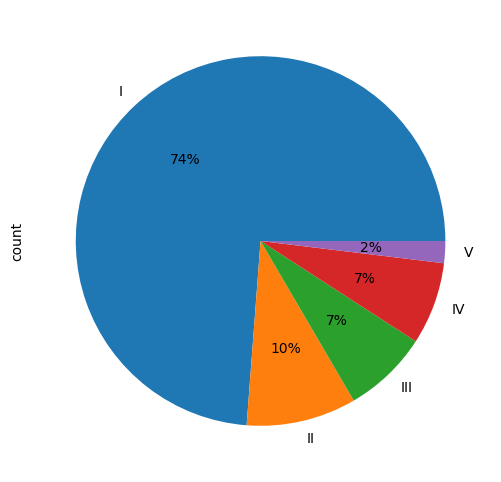

In [47]:
# Checking 5 random Descriptions and accident_levels from the data where the length of headline is > 100
print('--'*55); print('Checking 5 random Descriptions and accident_levels from the data where the length of Description is > 100'); print('--'*55)
indexes = list(data.loc[data['Description'].str.len() > 100, 'Description'].index)
rands = random.sample(indexes, 5)
descriptions, accident_levels = list(data.loc[rands, 'Description']), list(data.loc[rands, 'Accident Level'])

_ = [print(f'Description: {description}\naccident_level: {acclevel}\n') for description, acclevel in zip(descriptions, accident_levels)]

print('--'*40); print('Distributon of accident_level where the length of Description is > 100'); print('--'*40)
_ = data.loc[indexes, 'Accident Level'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['I', 'II', 'III', 'IV', 'V'], figsize = (10, 6))


* 74% of data where accident description > 100 is captured in low accident level.
* Based on some random headlines seen above, it appears that the data is mostly lower-cased. Pre-processing such as removing punctuations and lemmatization can be used.
* There are few alphanumeric characters like 042-TC-06, Nv. 3370, CX 212 captured in description where removing these characters might help.
* There are digits in the description for e.g. level 326, Dumper 01 where removing the digits wouldn't help.


------------------------------------------------------------------------------------------------------------------------
Checking 5 random Descriptions and pot_accident_levels from the data where the length of Description is > 100
------------------------------------------------------------------------------------------------------------------------
Description: When igniting the furnace 07 of the battery I, there was reflux of hot gas, reaching the face of the employee.
pot_accident_level: II

Description: While preparing to mount polypropylene tubing, the employee pulled the pickup from the truck and positioned it in place, pressing the finger between the tube and the concrete wall.
pot_accident_level: III

Description: At 14: 55h on 27 September, a worker from Confipetrol carried out industrial cleaning of the outside of the acid reduction tank D2055, to check the progress of the helmet mask; moment that hose pipe was released that was secured with pressure clamp (for water and air)

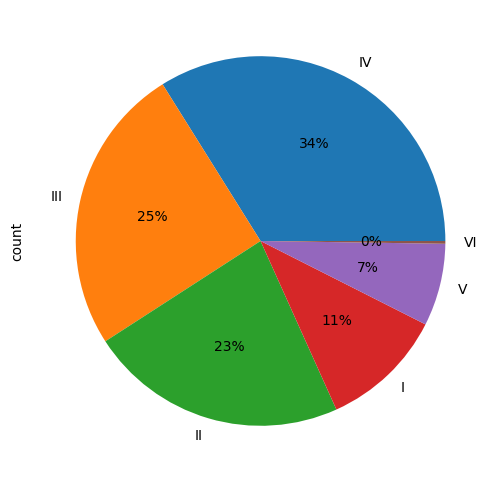

In [48]:
# Checking 5 random Descriptions and pot_accident_levels from the data where the length of headline is > 100
print('--'*60); print('Checking 5 random Descriptions and pot_accident_levels from the data where the length of Description is > 100'); print('--'*60)
indexes = list(data.loc[data['Description'].str.len() > 100, 'Description'].index)
rands = random.sample(indexes, 5)
descriptions, pot_accident_levels = list(data.loc[rands, 'Description']), list(data.loc[rands, 'Potential Accident Level'])

_ = [print(f'Description: {descriptin}\npot_accident_level: {pot_acclevel}\n') for descriptin, pot_acclevel in zip(descriptions, pot_accident_levels)]

print('--'*40); print('Distributon of pot_accident_level where the length of Description is > 100'); print('--'*40)
_ = data.loc[indexes, 'Potential Accident Level'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['IV', 'III', 'II', 'I', 'V', 'VI'], figsize = (10, 6))


* 34% of data where accident description > 100 is captured in high medium potential accident level.
* 25% of data where accident description > 100 is captured in medium potential accident level.
* 23% of data where accident description > 100 is captured in low potential accident level.
* Based on some random headlines seen above, it appears that the data is mostly lower-cased. Pre-processing such as removing punctuations and lemmatization can be used.
* There are few alphanumeric characters like AFO-755 captured in description where removing these characters might help.
* There are digits in the description for e.g. ditch 3570, 0.50 cm deep, 30 kg where removing the digits wouldn't help.


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conv

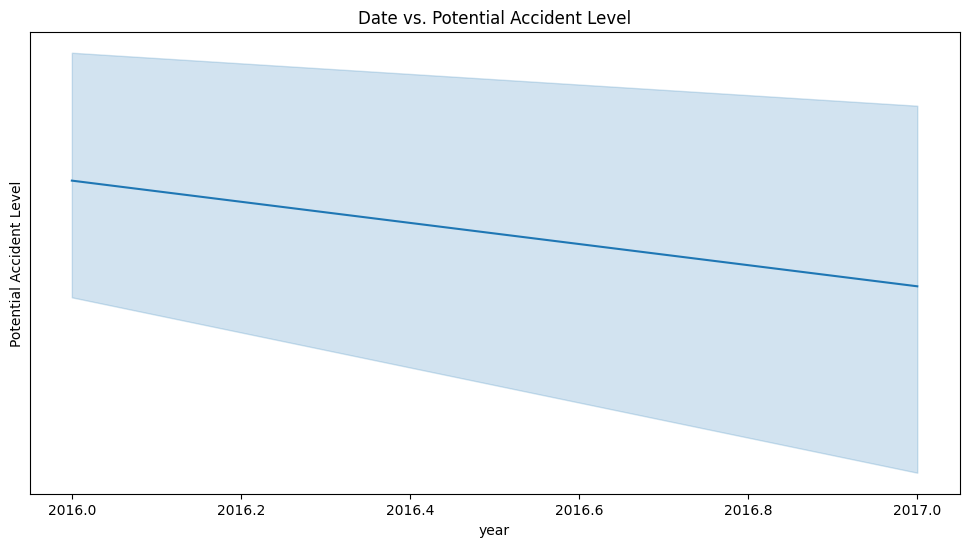

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bivariate EDA for Date vs. Potential Accident Level (Time Series)
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='Potential Accident Level', data=data)
plt.title('Date vs. Potential Accident Level')
plt.show()



In [ ]:
import plotly.express as px

# Bivariate EDA for Country vs. Potential Accident Level (Bar Plot)
fig = px.bar(data, x='Country', color='Potential Accident Level', title='Country vs. Potential Accident Level')
fig.update_layout(hovermode='y', xaxis=dict(title='Country'), yaxis=dict(title='Count'))
fig.show()

In [51]:
# Bivariate EDA for Local vs. Potential Accident Level (Bar Plot)
fig = px.bar(data, x='Local', color='Potential Accident Level', title='Local vs. Potential Accident Level')
fig.update_layout(hovermode='x', xaxis=dict(title='Local'), yaxis=dict(title='Count'))
fig.show()


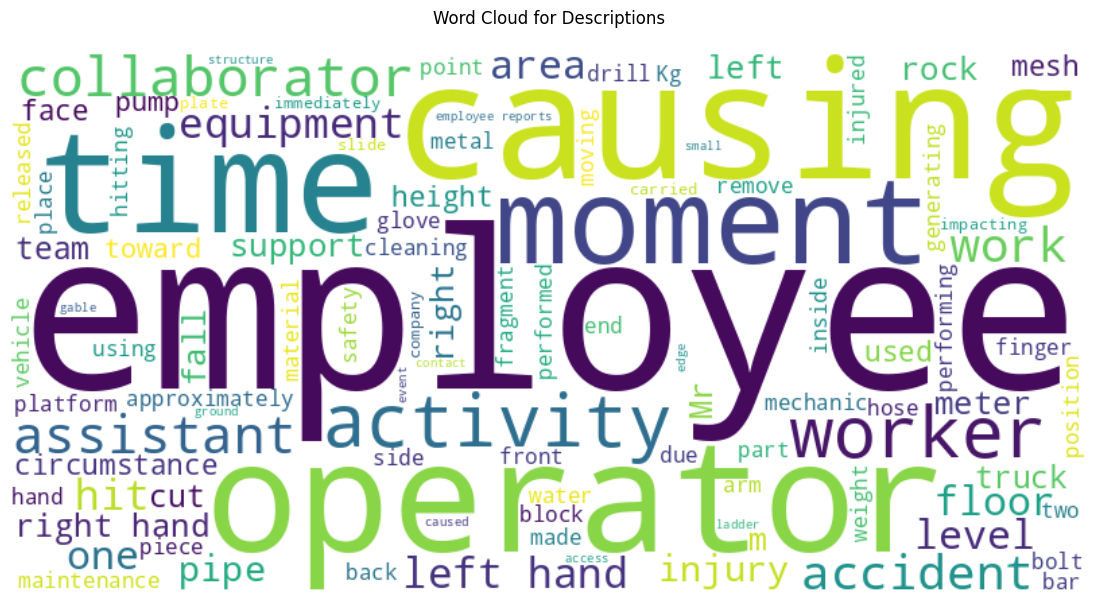

In [52]:
# Bivariate EDA for Description vs. Potential Accident Level (Word Cloud or Bar Plot of Unique Descriptions)
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(data['Description']))
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Descriptions\n')
plt.show()


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Future

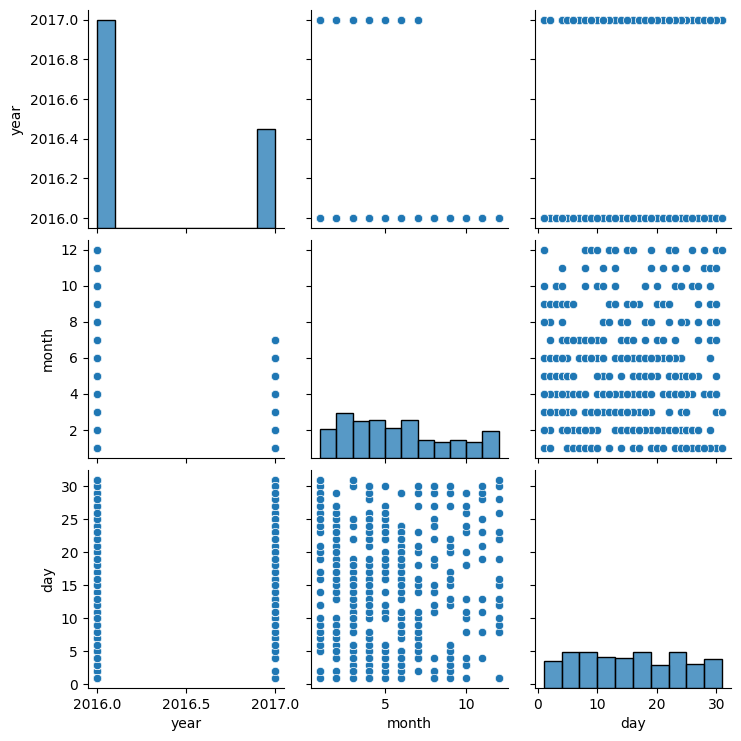

In [53]:
# Selecting only numeric columns for the pair plot
numeric_columns = data.select_dtypes(include=['int32', 'float64']).columns

# Creating the pair plot
sns.pairplot(data[numeric_columns])
plt.show()


In [54]:
# Data Preprocessing
df = data #just kept copy
# df['Cleaned_Description'] = data['Description']
df['Cleaned_Description'] = data['Description'].str.lower()


In [55]:
from nltk.tokenize import word_tokenize

df['Description_tokens'] = df['Cleaned_Description'].apply(word_tokenize)
df.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  year  month  day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

                                 Cleaned_Description  \
0  while removing the drill rod of the jumbo 08 f...   
1  during the activation of a sodium sulphide pum...   
2  in the sub-station milpo located at level +170...   
3  being 9:45 am. approximately in the nv. 1880 c...   
4  approximately at 11:45 a.m. in circumstances t...   

                                  Description_tokens  
0  [while, removing, the, drill, rod, of, the, ju...  
1  [during, the, activation, of, a, sodium, sulph...  
2  [in, the, sub-station, milpo, located, at, lev...  
3  [being, 9:45, am, ., approximately, in, the, n...  
4  [approximately, at, 11:45, a.m., in, circumsta...

In [56]:
import string

df['Cleaned_Description'] = df['Cleaned_Description'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  year  month  day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

                                 Cleaned_Description  \
0  while removing the drill rod of the jumbo 08 f...   
1  during the activation of a sodium sulphide pum...   
2  in the substation milpo located at level 170 w...   
3  being 945 am approximately in the nv 1880 cx69...   
4  approximately at 1145 am in circumstances that...   

                                  Description_tokens  
0  [while, removing, the, drill, rod, of, the, ju...  
1  [during, the, activation, of, a, sodium, sulph...  
2  [in, the, sub-station, milpo, located, at, lev...  
3  [being, 9:45, am, ., approximately, in, the, n...  
4  [approximately, at, 11:45, a.m., in, circumsta...

In [57]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

df['Description_tokens'] = df['Description_tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  year  month  day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

                                 Cleaned_Description  \
0  while removing the drill rod of the jumbo 08 f...   
1  during the activation of a sodium sulphide pum...   
2  in the substation milpo located at level 170 w...   
3  being 945 am approximately in the nv 1880 cx69...   
4  approximately at 1145 am in circumstances that...   

                                  Description_tokens  
0  [removing, drill, rod, jumbo, 08, maintenance,...  
1  [activation, sodium, sulphide, pump, ,, piping...  
2  [sub-station, milpo, located, level, +170, col...  
3  [9:45, ., approximately, nv, ., 1880, cx-695, ...  
4  [approximately, 11:45, a.m., circumstances, me...

In [58]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

df['Description_tokens'] = df['Description_tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  year  month  day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

                                 Cleaned_Description  \
0  while removing the drill rod of the jumbo 08 f...   
1  during the activation of a sodium sulphide pum...   
2  in the substation milpo located at level 170 w...   
3  being 945 am approximately in the nv 1880 cx69...   
4  approximately at 1145 am in circumstances that...   

                                  Description_tokens  
0  [removing, drill, rod, jumbo, 08, maintenance,...  
1  [activation, sodium, sulphide, pump, ,, piping...  
2  [sub-station, milpo, located, level, +170, col...  
3  [9:45, ., approximately, nv, ., 1880, cx-695, ...  
4  [approximately, 11:45, a.m., circumstance, mec...

In [59]:
df['Cleaned_Description'] = df['Cleaned_Description'].str.replace('[^a-zA-Z\s]', '')
df.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  year  month  day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

                                 Cleaned_Description  \
0  while removing the drill rod of the jumbo 08 f...   
1  during the activation of a sodium sulphide pum...   
2  in the substation milpo located at level 170 w...   
3  being 945 am approximately in the nv 1880 cx69...   
4  approximately at 1145 am in circumstances that...   

                                  Description_tokens  
0  [removing, drill, rod, jumbo, 08, maintenance,...  
1  [activation, sodium, sulphide, pump, ,, piping...  
2  [sub-station, milpo, located, level, +170, col...  
3  [9:45, ., approximately, nv, ., 1880, cx-695, ...  
4  [approximately, 11:45, a.m., circumstance, mec...

In [60]:
import re
df['Cleaned_Description'] = df['Cleaned_Description'].apply(lambda x: re.sub(r'<.*?>', '', x))  # Remove HTML tags
df['Cleaned_Description'] = df['Cleaned_Description'].apply(lambda x: re.sub(r'http\S+', '', x))  # Remove URLs
df.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  year  month  day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

                                 Cleaned_Description  \
0  while removing the drill rod of the jumbo 08 f...   
1  during the activation of a sodium sulphide pum...   
2  in the substation milpo located at level 170 w...   
3  being 945 am approximately in the nv 1880 cx69...   
4  approximately at 1145 am in circumstances that...   

                                  Description_tokens  
0  [removing, drill, rod, jumbo, 08, maintenance,...  
1  [activation, sodium, sulphide, pump, ,, piping...  
2  [sub-station, milpo, located, level, +170, col...  
3  [9:45, ., approximately, nv, ., 1880, cx-695, ...  
4  [approximately, 11:45, a.m., circumstance, mec...

* Converting description to lower case
* Replacing apostrophes to the standard lexicons
* Removing punctuations
* Applying Lemmatizer
* Removing multiple spaces between words
* Removing stop words


In [61]:
print('--'*45); print('Get the length of each line, find the maximum length and print the maximum length line'); 
print('Length of line ranges from 64 to 672.'); print('--'*45)

# Get length of each line
df['line_length'] = df['Description'].str.len()

print('Minimum line length: {}'.format(df['line_length'].min()))
print('Maximum line length: {}'.format(df['line_length'].max()))
print('Line with maximum length: {}'.format(df[df['line_length'] == df['line_length'].max()]['Description'].values[0]))


------------------------------------------------------------------------------------------
Get the length of each line, find the maximum length and print the maximum length line
Length of line ranges from 64 to 672.
------------------------------------------------------------------------------------------
Minimum line length: 94
Maximum line length: 1029
Line with maximum length: When performing the sleeve removal maneuver, when the hole was 600 meters deep, General da Silva pressed only one side of the locking nut of the rods, which together with the jack, holds the entire weight of the rods in the maneuver. As the locking procedure was not effective, the weight of the rods was only secured by the steel wire rope of the probe winch. At the moment that driller Pedro released the brake of the winch, the inefficacy of the locking done only in one side of the chestnut and without aid of the monkey, caused the sliding of the rods. Auxiliary was prepared for manual unlocking of the rods, ho

In [62]:
print('--'*45); print('Get the number of words, find the maximum number of words and print the maximum number of words'); 
print('Number of words ranges from 10 to 98.'); print('--'*45)

# Get length of each line
df['nb_words'] = df['Description'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(df['nb_words'].min()))
print('Maximum number of words: {}'.format(df['nb_words'].max()))
print('Line with maximum number of words: {}'.format(df[df['nb_words'] == df['nb_words'].max()]['Description'].values[0]))
df.head(2)

------------------------------------------------------------------------------------------
Get the number of words, find the maximum number of words and print the maximum number of words
Number of words ranges from 10 to 98.
------------------------------------------------------------------------------------------
Minimum number of words: 16
Maximum number of words: 183
Line with maximum number of words: When performing the sleeve removal maneuver, when the hole was 600 meters deep, General da Silva pressed only one side of the locking nut of the rods, which together with the jack, holds the entire weight of the rods in the maneuver. As the locking procedure was not effective, the weight of the rods was only secured by the steel wire rope of the probe winch. At the moment that driller Pedro released the brake of the winch, the inefficacy of the locking done only in one side of the chestnut and without aid of the monkey, caused the sliding of the rods. Auxiliary was prepared for manual 

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   

  Potential Accident Level Gender Employee type        Critical Risk  \
0                       IV   Male   Third Party              Pressed   
1                       IV   Male      Employee  Pressurized Systems   

                                         Description  year  month  day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   

                                 Cleaned_Description  \
0  while removing the drill rod of the jumbo 08 f...   
1  during the activation of a sodium sulphide pum...   

                                  Description_tokens  line_length  nb_words  
0  [removing, drill, rod, jumbo, 08, maintenance,...          457        80  
1  [activation, sodium, sulphide, pump, ,, piping...          307        54

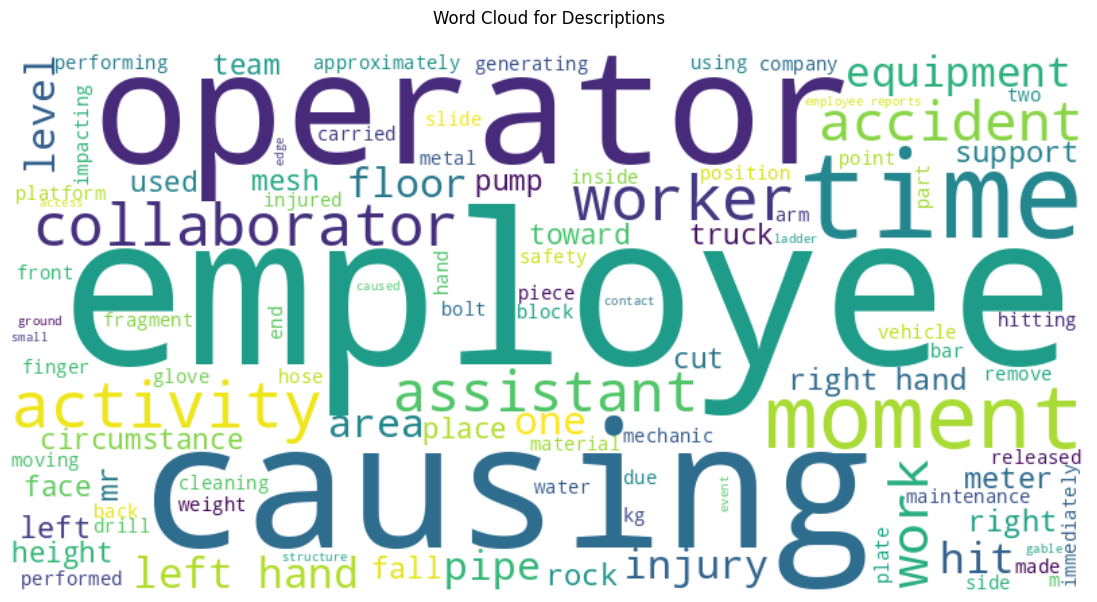

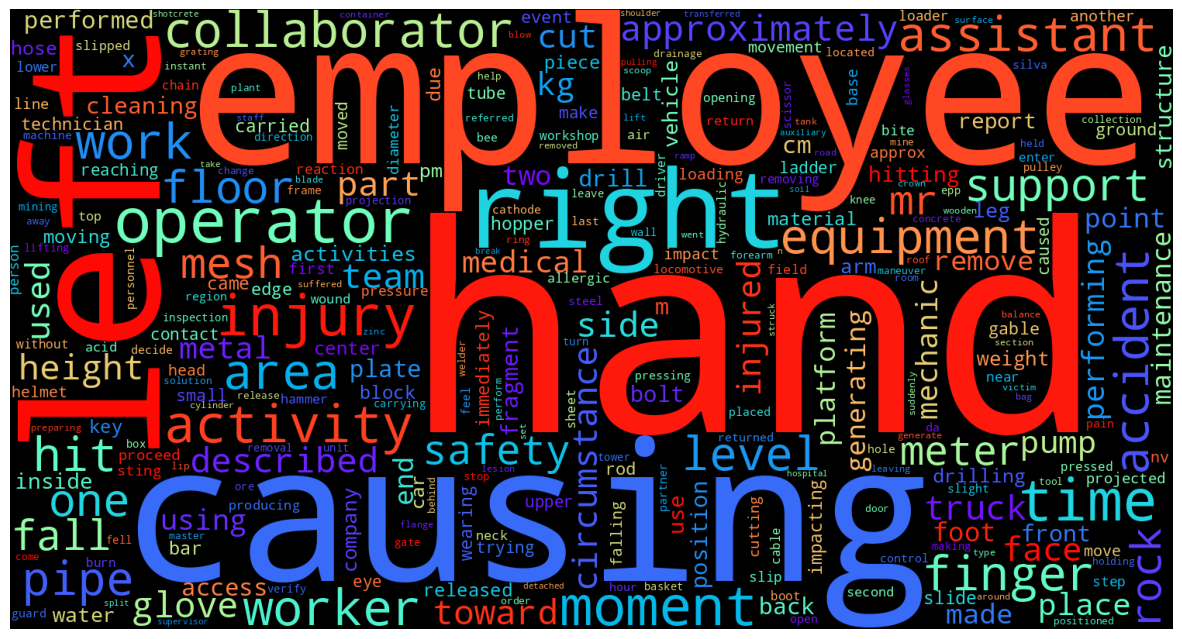

In [63]:
# Word cloud for Description cleaning

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(df['Cleaned_Description']))
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Descriptions\n')
plt.show()

wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False).generate(" ".join(data['Cleaned_Description'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


* Body-related: left, right, hand, finger, face, foot and glove
* Employee-related: employee, operator, collaborator, assistant, worker and mechanic
* Movement-related: fall, hit, lift and slip
* Equipment-related: equipment, pump, meter, drill, truck and tube
* Accident-related: accident, activity, safety, injury, causing


In [64]:
print('--'*30); print('Five point summary for number of words')
display(df['nb_words'].describe().round(0).astype(int)); 
# remove
print('99% quantilie: {}'.format(df['nb_words'].quantile(0.99)));print('--'*30)


------------------------------------------------------------
Five point summary for number of words


count    418
mean      65
std       32
min       16
25%       40
50%       60
75%       83
max      183
Name: nb_words, dtype: int64

99% quantilie: 159.48999999999995
------------------------------------------------------------


In [65]:
df['Employee type'] = df['Employee type'].str.replace(' ', '_')
df['Employee type'].value_counts()

Employee type
Third_Party             185
Employee                178
Third_Party_(Remote)     55
Name: count, dtype: int64

In [66]:
# To replace white space everywhere in Critical Risk
df['Critical Risk'] = df['Critical Risk'].str.replace('\n', '').str.replace(' ', '_')
df['Critical Risk'].value_counts().head()


Critical Risk
Others                 229
Pressed                 24
Manual_Tools            20
Chemical_substances     17
Cut                     14
Name: count, dtype: int64

In [67]:
# 4: Data preparation - Cleansed data in .xlsx or .csv file
# Save to Excel file (.xlsx)
df.to_excel('cleansed_industrial_safety_data.xlsx', index=False)

# Save to CSV file (.csv)
df.to_csv('cleansed_industrial_safety_data.csv', index=False)

In [68]:
# Create Industry DataFrame
ind_featenc_df = pd.DataFrame()

# Label encoding
# industry_df['Season'] = industry_df['Season'].replace('Summer', 'aSummer').replace('Autumn', 'bAutumn').replace('Winter', 'cWinter').replace('Spring', 'dSpring')
# ind_featenc_df['Season'] = LabelEncoder().fit_transform(industry_df['Season']).astype(np.int8)

# industry_df['Weekday'] = industry_df['Weekday'].replace('Monday', 'aMonday').replace('Tuesday', 'bTuesday').replace('Wednesday', 'cWednesday').replace('Thursday', 'dThursday').replace('Friday', 'eFriday').replace('Saturday', 'fSaturday').replace('Sunday', 'gSunday')
# ind_featenc_df['Weekday'] = LabelEncoder().fit_transform(industry_df['Weekday']).astype(np.int8)

ind_featenc_df['Accident Level'] = LabelEncoder().fit_transform(df['Accident Level']).astype(np.int8)
ind_featenc_df['Potential Accident Level'] = LabelEncoder().fit_transform(df['Potential Accident Level']).astype(np.int8)

print(ind_featenc_df.head(2))
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(ind_featenc_df['Accident Level'])
dummy_y



   Accident Level  Potential Accident Level
0               0                         3
1               0                         3


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [69]:
# Dummy variables encoding
Country_dummies = pd.get_dummies(df['Country'], columns=["Country"], drop_first=True)
Local_dummies = pd.get_dummies(df['Local'], columns=["Local"], drop_first=True)
Gender_dummies = pd.get_dummies(df['Gender'], columns=["Gender"], drop_first=True)
IS_dummies = pd.get_dummies(df['Industry Sector'], columns=['Industry Sector'], prefix='IS', drop_first=True)
EmpType_dummies = pd.get_dummies(df['Employee type'], columns=['Employee type'], prefix='EmpType', drop_first=True)
CR_dummies = pd.get_dummies(df['Critical Risk'], columns=['Critical Risk'], prefix='CR', drop_first=True)

# Merge the above dataframe with the original dataframe ind_feat_df
ind_featenc_df = ind_featenc_df.join(Country_dummies.reset_index(drop=True)).join(Local_dummies.reset_index(drop=True)).join(Gender_dummies.reset_index(drop=True)).join(IS_dummies.reset_index(drop=True)).join(EmpType_dummies.reset_index(drop=True)).join(CR_dummies.reset_index(drop=True))

ind_featenc_df = df[['year','month','day']].reset_index(drop=True).join(ind_featenc_df.reset_index(drop=True))

ind_featenc_df.head(3)


year  month  day  Accident Level  Potential Accident Level  Country_02  \
0  2016      1    1               0                         3       False   
1  2016      1    2               0                         3        True   
2  2016      1    6               0                         2       False   

   Country_03  Local_02  Local_03  Local_04  ...  CR_Projection  \
0       False     False     False     False  ...          False   
1       False      True     False     False  ...          False   
2       False     False      True     False  ...          False   

   CR_Projection/Burning  CR_Projection/Choco  CR_Projection/Manual_Tools  \
0                  False                False                       False   
1                  False                False                       False   
2                  False                False                       False   

   CR_Projection_of_fragments  CR_Suspended_Loads  CR_Traffic  \
0                       False               False       False   
1                       False               False       False   
2                       False               False       False   

   CR_Vehicles_and_Mobile_Equipment  CR_Venomous_Animals  CR_remains_of_choco  
0                             False                False                False  
1                             False                False                False  
2                             False                False                False  

[3 rows x 55 columns]

In [70]:
# Check NaN values
np.any(np.isnan(ind_featenc_df))


False

In [71]:
embeddings_index = {}
EMBEDDING_FILE = 'glove.6B.200d.txt'
f = open(EMBEDDING_FILE)
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:28, 13903.75it/s]

Found 400000 word vectors.


In [72]:

# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())


ind_glove_df = [sent2vec(x) for x in tqdm(df['Cleaned_Description'])]

100%|███████████████████████████████████████| 418/418 [00:00<00:00, 1781.98it/s]


In [73]:
# Consider only top 30 GLOVE features
ind_feat_df = ind_featenc_df.join(pd.DataFrame(ind_glove_df).iloc[:,0:30].reset_index(drop=True))


In [74]:
ind_feat_df.head(3)


year  month  day  Accident Level  Potential Accident Level  Country_02  \
0  2016      1    1               0                         3       False   
1  2016      1    2               0                         3        True   
2  2016      1    6               0                         2       False   

   Country_03  Local_02  Local_03  Local_04  ...        20        21  \
0       False     False     False     False  ... -0.043012  0.614812   
1       False      True     False     False  ... -0.107699  0.564138   
2       False     False      True     False  ... -0.008735  0.582276   

         22        23        24        25        26        27        28  \
0  0.090625  0.001879  0.034345  0.034816 -0.030851  0.025824 -0.031809   
1 -0.058079 -0.074854  0.115027 -0.104237 -0.077160  0.004913  0.001651   
2  0.069600 -0.024584  0.052616  0.001921 -0.020729 -0.004270 -0.085750   

         29  
0 -0.069344  
1  0.051122  
2 -0.091348  

[3 rows x 85 columns]

In [75]:
# Consider only top 30 GLOVE features
# ind_feat_df = ind_featenc_df.join(ind_tfidf_df.reset_index(drop=True))


In [76]:
ind_feat_df.head(3)


year  month  day  Accident Level  Potential Accident Level  Country_02  \
0  2016      1    1               0                         3       False   
1  2016      1    2               0                         3        True   
2  2016      1    6               0                         2       False   

   Country_03  Local_02  Local_03  Local_04  ...        20        21  \
0       False     False     False     False  ... -0.043012  0.614812   
1       False      True     False     False  ... -0.107699  0.564138   
2       False     False      True     False  ... -0.008735  0.582276   

         22        23        24        25        26        27        28  \
0  0.090625  0.001879  0.034345  0.034816 -0.030851  0.025824 -0.031809   
1 -0.058079 -0.074854  0.115027 -0.104237 -0.077160  0.004913  0.001651   
2  0.069600 -0.024584  0.052616  0.001921 -0.020729 -0.004270 -0.085750   

         29  
0 -0.069344  
1  0.051122  
2 -0.091348  

[3 rows x 85 columns]

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd

ind_tfidf_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(df['Cleaned_Description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names_out()])
    ind_tfidf_df = pd.concat([ind_tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

ind_tfidf_df.head(3)


TFIDF_activity  TFIDF_area  TFIDF_causing  TFIDF_employee  TFIDF_hand  \
0             0.0     0.00000       0.000000             0.0    0.000000   
1             0.0     1.00000       0.000000             0.0    0.000000   
2             0.0     0.55361       0.383117             0.0    0.413742   

   TFIDF_injury  TFIDF_left  TFIDF_operator  TFIDF_right  TFIDF_time  ...  \
0      0.000000    0.000000             0.0          0.0         0.0  ...   
1      0.000000    0.000000             0.0          0.0         0.0  ...   
2      0.460892    0.403897             0.0          0.0         0.0  ...   

   TFIDF_causing injury described  TFIDF_described time accident  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   

   TFIDF_finger left hand  TFIDF_finger right hand  \
0                     0.0                      0.0   
1                     0.0                      0.0   
2                     0.0                      0.0   

   TFIDF_generating described injury  TFIDF_hand causing injury  \
0                                0.0                        0.0   
1                                0.0                        0.0   
2                                0.0                        0.0   

   TFIDF_injury time accident  TFIDF_left hand causing  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   

   TFIDF_right hand causing  TFIDF_time accident employee  
0                       0.0                           0.0  
1                       0.0                           0.0  
2                       0.0                           0.0  

[3 rows x 30 columns]

In [78]:
# To replace white space everywhere in Employee type
df['Employee type'] = df['Employee type'].str.replace(' ', '_')
df['Employee type'].value_counts()


Employee type
Third_Party             185
Employee                178
Third_Party_(Remote)     55
Name: count, dtype: int64

In [79]:
df['Critical Risk'] = df['Critical Risk'].str.replace('\n', '').str.replace(' ', '_')
df['Critical Risk'].value_counts().head()


Critical Risk
Others                 229
Pressed                 24
Manual_Tools            20
Chemical_substances     17
Cut                     14
Name: count, dtype: int64

In [80]:
# Create Industry DataFrame
ind_featenc_df = pd.DataFrame()

# Label encoding
ind_featenc_df['Accident Level'] = LabelEncoder().fit_transform(df['Accident Level']).astype(np.int8)
ind_featenc_df['Potential Accident Level'] = LabelEncoder().fit_transform(df['Potential Accident Level']).astype(np.int8)


In [81]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(ind_featenc_df['Accident Level'])
dummy_y


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [82]:
# Dummy variables encoding
Country_dummies = pd.get_dummies(df['Country'], columns=["Country"], drop_first=True)
Local_dummies = pd.get_dummies(df['Local'], columns=["Local"], drop_first=True)
Gender_dummies = pd.get_dummies(df['Gender'], columns=["Gender"], drop_first=True)
IS_dummies = pd.get_dummies(df['Industry Sector'], columns=['Industry Sector'], prefix='IS', drop_first=True)
EmpType_dummies = pd.get_dummies(df['Employee type'], columns=['Employee type'], prefix='EmpType', drop_first=True)
CR_dummies = pd.get_dummies(df['Critical Risk'], columns=['Critical Risk'], prefix='CR', drop_first=True)

# Merge the above dataframe with the original dataframe ind_feat_df
ind_featenc_df = ind_featenc_df.join(Country_dummies.reset_index(drop=True)).join(Local_dummies.reset_index(drop=True)).join(Gender_dummies.reset_index(drop=True)).join(IS_dummies.reset_index(drop=True)).join(EmpType_dummies.reset_index(drop=True)).join(CR_dummies.reset_index(drop=True))

ind_featenc_df = df[['year','month','day']].reset_index(drop=True).join(ind_featenc_df.reset_index(drop=True))

ind_featenc_df.head(3)


year  month  day  Accident Level  Potential Accident Level  Country_02  \
0  2016      1    1               0                         3       False   
1  2016      1    2               0                         3        True   
2  2016      1    6               0                         2       False   

   Country_03  Local_02  Local_03  Local_04  ...  CR_Projection  \
0       False     False     False     False  ...          False   
1       False      True     False     False  ...          False   
2       False     False      True     False  ...          False   

   CR_Projection/Burning  CR_Projection/Choco  CR_Projection/Manual_Tools  \
0                  False                False                       False   
1                  False                False                       False   
2                  False                False                       False   

   CR_Projection_of_fragments  CR_Suspended_Loads  CR_Traffic  \
0                       False               False       False   
1                       False               False       False   
2                       False               False       False   

   CR_Vehicles_and_Mobile_Equipment  CR_Venomous_Animals  CR_remains_of_choco  
0                             False                False                False  
1                             False                False                False  
2                             False                False                False  

[3 rows x 55 columns]

In [83]:
np.any(np.isnan(ind_featenc_df))


False

In [84]:
# Consider only top 30 GLOVE features
ind_feat_df = ind_featenc_df.join(pd.DataFrame(ind_glove_df).iloc[:,0:30].reset_index(drop=True))
ind_feat_df.head(2)

year  month  day  Accident Level  Potential Accident Level  Country_02  \
0  2016      1    1               0                         3       False   
1  2016      1    2               0                         3        True   

   Country_03  Local_02  Local_03  Local_04  ...        20        21  \
0       False     False     False     False  ... -0.043012  0.614812   
1       False      True     False     False  ... -0.107699  0.564138   

         22        23        24        25        26        27        28  \
0  0.090625  0.001879  0.034345  0.034816 -0.030851  0.025824 -0.031809   
1 -0.058079 -0.074854  0.115027 -0.104237 -0.077160  0.004913  0.001651   

         29  
0 -0.069344  
1  0.051122  

[2 rows x 85 columns]

In [85]:
# Consider only top 30 GLOVE features
ind_feat_df = ind_featenc_df.join(ind_tfidf_df.reset_index(drop=True))
ind_feat_df.head(2)

year  month  day  Accident Level  Potential Accident Level  Country_02  \
0  2016      1    1               0                         3       False   
1  2016      1    2               0                         3        True   

   Country_03  Local_02  Local_03  Local_04  ...  \
0       False     False     False     False  ...   
1       False      True     False     False  ...   

   TFIDF_causing injury described  TFIDF_described time accident  \
0                             0.0                            0.0   
1                             0.0                            0.0   

   TFIDF_finger left hand  TFIDF_finger right hand  \
0                     0.0                      0.0   
1                     0.0                      0.0   

   TFIDF_generating described injury  TFIDF_hand causing injury  \
0                                0.0                        0.0   
1                                0.0                        0.0   

   TFIDF_injury time accident  TFIDF_left hand causing  \
0                         0.0                      0.0   
1                         0.0                      0.0   

   TFIDF_right hand causing  TFIDF_time accident employee  
0                       0.0                           0.0  
1                       0.0                           0.0  

[2 rows x 85 columns]

In [86]:
from gensim.models import Word2Vec
X = ind_feat_df.drop(['Accident Level','Potential Accident Level'], axis = 1) # Considering all Predictors
y = ind_feat_df['Accident Level']



In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)


In [88]:
X_train, X_test, y_train_dummy, y_test_dummy = train_test_split(X, dummy_y, test_size = 0.20, random_state = 1, stratify = y)


In [89]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))


X_train shape : (334,83)
y_train shape : (334,)
X_test shape : (84,83)
y_test shape : (84,)


In [90]:
#Resampling
# Display old accident level counts
ind_feat_df['Accident Level'].value_counts()


Accident Level
0    309
1     40
2     31
3     30
4      8
Name: count, dtype: int64

In [91]:

# Concatenate our training data back together
X_up = pd.concat([X_train, y_train], axis=1)

# Get the majority and minority class
acclevel_0_majority = X_up[X_up['Accident Level'] == 0]
acclevel_1_minority = X_up[X_up['Accident Level'] == 1]
acclevel_2_minority = X_up[X_up['Accident Level'] == 2]
acclevel_3_minority = X_up[X_up['Accident Level'] == 3]
acclevel_4_minority = X_up[X_up['Accident Level'] == 4]

# Upsample Level1 minority class
acclevel_1_minority_upsampled = resample(acclevel_1_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level2 minority class
acclevel_2_minority_upsampled = resample(acclevel_2_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level3 minority class
acclevel_3_minority_upsampled = resample(acclevel_3_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level4 minority class
acclevel_4_minority_upsampled = resample(acclevel_4_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)


In [92]:
# Combine majority class with upsampled minority classes
df_upsampled = pd.concat([acclevel_0_majority, acclevel_1_minority_upsampled, acclevel_2_minority_upsampled, acclevel_3_minority_upsampled, 
                          acclevel_4_minority_upsampled])


In [93]:
# Display new accident level counts
df_upsampled['Accident Level'].value_counts()


Accident Level
0    247
1    247
2    247
3    247
4    247
Name: count, dtype: int64

In [94]:
# Separate input features and target
# Separate input features and target
X_train_up = df_upsampled.drop(['Accident Level'], axis = 1) # Considering all Predictors
y_train_up = df_upsampled['Accident Level']


In [95]:
sm = SMOTE(random_state=1)

# X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
X_train.isnull().sum().sum()

print(X_train.dtypes)
print(y_train.dtypes)

# Check for missing values
print(X_train.isnull().sum())
print(y_train.isnull().sum())

print("Before resampling:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Apply resampling
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("After resampling:")
print("X_train_smote shape:", X_train_smote.shape)
print("y_train_smote shape:", y_train_smote.shape)
# WIP --- for smote

# y_train.isnull().sum()

# df_smote = pd.concat([pd.DataFrame(X_train_smote), pd.DataFrame(y_train_smote)], axis=1)
# df_smote.columns = ['year', 'month', 'day', 'Country_02', 'Country_03', 'Local_02',
#        'Local_03', 'Local_04', 'Local_05', 'Local_06', 'Local_07', 'Local_08',
#        'Local_09', 'Local_10', 'Local_11', 'Local_12', 'Male', 'IS_Mining',
#        'IS_Others', 'EmpType_Third_Party', 'EmpType_Third_Party_(Remote)',
#        'CR_Blocking_and_isolation_of_energies', 'CR_Burn',
#        'CR_Chemical_substances', 'CR_Confined_space', 'CR_Cut',
#        'CR_Electrical_Shock', 'CR_Electrical_installation', 'CR_Fall',
#        'CR_Fall_prevention', 'CR_Fall_prevention_(same_level)',
#        'CR_Individual_protection_equipment', 'CR_Liquid_Metal',
#        'CR_Machine_Protection', 'CR_Manual_Tools', 'CR_Not_applicable',
#        'CR_Others', 'CR_Plates', 'CR_Poll', 'CR_Power_lock', 'CR_Pressed',
#        'CR_Pressurized_Systems',
#        'CR_Pressurized_Systems_/_Chemical_Substances', 'CR_Projection',
#        'CR_Projection/Burning', 'CR_Projection/Choco',
#        'CR_Projection/Manual_Tools', 'CR_Projection_of_fragments',
#        'CR_Suspended_Loads', 'CR_Traffic', 'CR_Vehicles_and_Mobile_Equipment',
#        'CR_Venomous_Animals', 'CR_remains_of_choco', 'TFIDF_activity',
#        'TFIDF_area', 'TFIDF_causing', 'TFIDF_employee', 'TFIDF_hand',
#        'TFIDF_injury', 'TFIDF_left', 'TFIDF_operator', 'TFIDF_right',
#        'TFIDF_time', 'TFIDF_causing injury', 'TFIDF_described injury',
#        'TFIDF_employee reports', 'TFIDF_finger left', 'TFIDF_injury described',
#        'TFIDF_left foot', 'TFIDF_left hand', 'TFIDF_medical center',
#        'TFIDF_right hand', 'TFIDF_time accident',
#        'TFIDF_causing injury described', 'TFIDF_described time accident',
#        'TFIDF_finger left hand', 'TFIDF_finger right hand',
#        'TFIDF_generating described injury', 'TFIDF_hand causing injury',
#        'TFIDF_injury time accident', 'TFIDF_left hand causing',
#        'TFIDF_right hand causing', 'TFIDF_time accident employee']


year                              int32
month                             int32
day                               int32
Country_02                         bool
Country_03                         bool
                                 ...   
TFIDF_hand causing injury       float64
TFIDF_injury time accident      float64
TFIDF_left hand causing         float64
TFIDF_right hand causing        float64
TFIDF_time accident employee    float64
Length: 83, dtype: object
int8
year                            0
month                           0
day                             0
Country_02                      0
Country_03                      0
                               ..
TFIDF_hand causing injury       0
TFIDF_injury time accident      0
TFIDF_left hand causing         0
TFIDF_right hand causing        0
TFIDF_time accident employee    0
Length: 83, dtype: int64
0
Before resampling:
X_train shape: (334, 83)
y_train shape: (334,)
After resampling:
X_train_smote shape: (1235, 83)
y_train_smot

In [96]:
# Transform independent features
scaler_X = StandardScaler()#StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])
X_train.iloc[:,:6] = pipeline.fit_transform(X_train.iloc[:,:6]) # Scaling only first 6 feautres

X_test.iloc[:,:6] = pipeline.fit_transform(X_test.iloc[:,:6]) # Scaling only first 6 feautres


In [97]:
X_train.head(3)


year     month       day  Country_02  Country_03  Local_02  Local_03  \
202 -0.700765  1.168926 -1.673853    1.551826    -0.33665 -0.224309     False   
258 -0.700765  1.802213  1.559083    1.551826    -0.33665 -0.224309     False   
6   -0.700765 -1.364221  0.058077    1.551826    -0.33665 -0.224309     False   

     Local_04  Local_05  Local_06  ...  TFIDF_causing injury described  \
202     False      True     False  ...                             0.0   
258     False     False     False  ...                             0.0   
6       False      True     False  ...                             0.0   

     TFIDF_described time accident  TFIDF_finger left hand  \
202                            0.0                     0.0   
258                            0.0                     0.0   
6                              0.0                     0.0   

     TFIDF_finger right hand  TFIDF_generating described injury  \
202                      0.0                                0.0   
258                      0.0                                0.0   
6                        0.0                                0.0   

     TFIDF_hand causing injury  TFIDF_injury time accident  \
202                        0.0                         0.0   
258                        0.0                         0.0   
6                          0.0                         0.0   

     TFIDF_left hand causing  TFIDF_right hand causing  \
202                      0.0                       0.0   
258                      0.0                       0.0   
6                        0.0                       0.0   

     TFIDF_time accident employee  
202                           0.0  
258                           0.0  
6                             0.0  

[3 rows x 83 columns]

In [98]:
# generating the covariance matrix and the eigen values for the PCA analysis
print(type(X_train))
# none_columns = X_train.columns[X_train.applymap(lambda x: x is Float64).any()]

# Print or handle the columns with None values
# print("Columns with None values:", len(none_columns))

# print(X_train.T.dtypes)
# !pip install -U threadpoolctl
# !pip install imbalanced-learn

# print(X_train.dtype)

numeric_columns = X_train.select_dtypes(include=['number']).columns
print(numeric_columns)
cov_matrix = np.cov(X_train[numeric_columns].T)

print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)


# cov_matrix = np.cov(X_train.T) # the relevanat covariance matrix
# print('Covariance Matrix \n%s', cov_matrix)

# #generating the eigen values and the eigen vectors
# e_vals, e_vecs = np.linalg.eig(cov_matrix)
# print('Eigenvectors \n%s' %e_vecs)
# print('\nEigenvalues \n%s' %e_vals)


<class 'pandas.core.frame.DataFrame'>
Index(['year', 'month', 'day', 'Country_02', 'Country_03', 'Local_02',
       'TFIDF_activity', 'TFIDF_area', 'TFIDF_causing', 'TFIDF_employee',
       'TFIDF_hand', 'TFIDF_injury', 'TFIDF_left', 'TFIDF_operator',
       'TFIDF_right', 'TFIDF_time', 'TFIDF_causing injury',
       'TFIDF_described injury', 'TFIDF_employee reports', 'TFIDF_finger left',
       'TFIDF_injury described', 'TFIDF_left foot', 'TFIDF_left hand',
       'TFIDF_medical center', 'TFIDF_right hand', 'TFIDF_time accident',
       'TFIDF_causing injury described', 'TFIDF_described time accident',
       'TFIDF_finger left hand', 'TFIDF_finger right hand',
       'TFIDF_generating described injury', 'TFIDF_hand causing injury',
       'TFIDF_injury time accident', 'TFIDF_left hand causing',
       'TFIDF_right hand causing', 'TFIDF_time accident employee'],
      dtype='object')
Covariance Matrix 
%s [[ 1.00300300e+00 -4.24727770e-01  2.53271550e-02 ... -2.06945085e-03
  -4.89406

In [99]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)


Cumulative Variance Explained [ 20.15786221  39.8465723   53.71500995  66.4648978   75.60060195
  83.38740302  85.36341562  87.15105654  88.78495976  90.23112936
  91.23158432  92.16804952  93.02500321  93.83193903  94.53858734
  95.147494    95.70336576  96.2464299   96.73819905  97.15862877
  97.57315368  97.96305959  98.27700494  98.54143292  98.76856542
  98.97955542  99.1783127   99.36739174  99.51237029  99.62615312
  99.73874375  99.83721902  99.90909031  99.95322959  99.97962664
 100.        ]


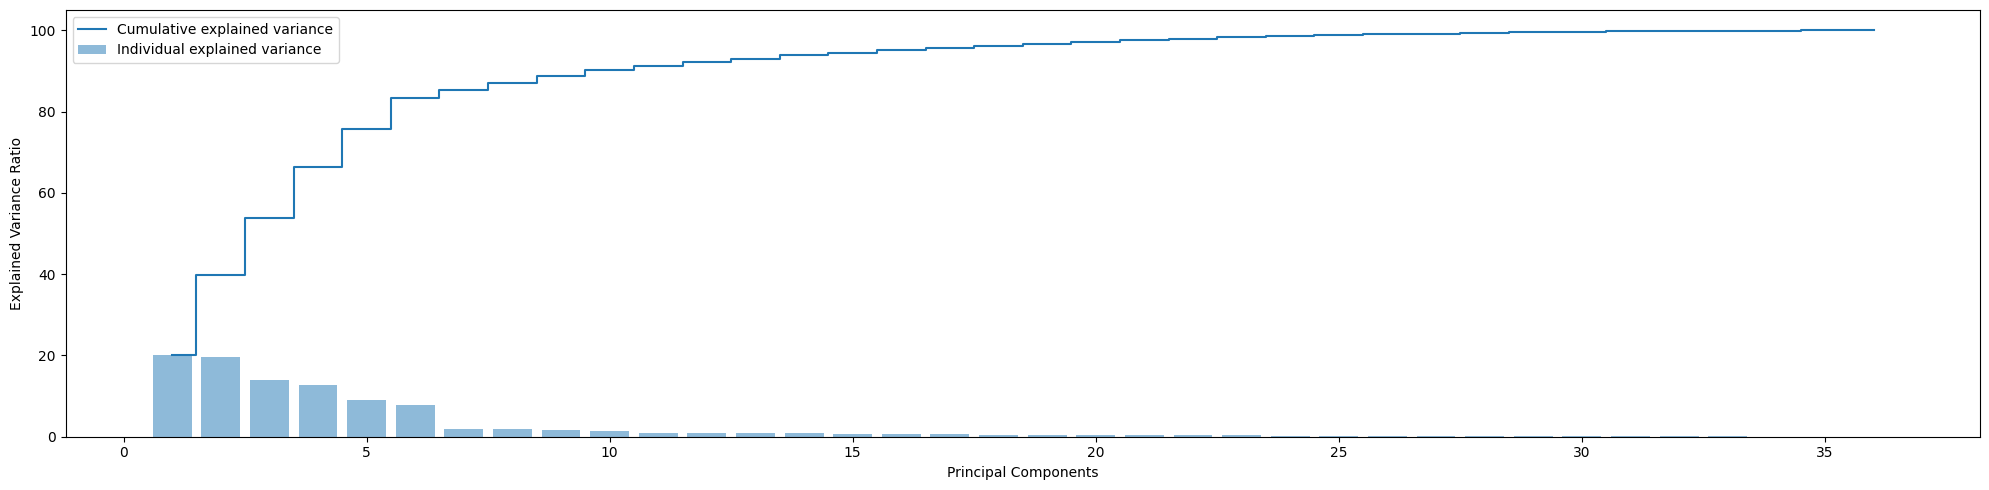

In [100]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(20 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()


In [101]:
# Capturing 90% variance of the data
pca = PCA(n_components = 0.90)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)


In [102]:
print(X_train_reduced.shape)
print(X_test_reduced.shape)


(334, 20)
(84, 20)


In [103]:
# DummyClassifier to predict all Accident levels
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))


Unique predicted labels:  [0 1 2 3 4]
Test score:  0.5833333333333334


In [104]:
# Checking unique values
predictions = pd.DataFrame(dummy_pred)
predictions[0].value_counts()


0
0    64
3    11
1     5
2     3
4     1
Name: count, dtype: int64

In [105]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota


In [106]:
def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, scale, report, save_model):
    
    if report == "yes":
        print (model)
        print ("***************************************************************************")

    if method == 'CatBoostClassifier' or method == 'LGBMClassifier':

      model.fit(X_train, y_train) # Fit the model on Training set
    else:
      model.fit(X_train, y_train) # Fit the model on Training set

    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
    
    if of_type == "coef":
        # Intercept and Coefficients
        print("The intercept for our model is {}".format(model.intercept_), "\n")
        
        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))

    y_pred = model.predict(X_test) # Predict on Test set

    # Initialise mc_logloss
    mc_logloss = 1.00
    if method != 'RidgeClassifier':
      y_predictions = model.predict_proba(X_test)

    train_accuracy_score = model.score(X_train, y_train)
    test_accuracy_score = model.score(X_test, y_test)

    precision_score = precision_score(y_test, y_pred, average='weighted')
    recall_score = recall_score(y_test, y_pred, average='weighted')
    f1_score = f1_score(y_test, y_pred, average='weighted')

    if method != 'RidgeClassifier':
      mc_logloss = multiclass_logloss(y_test, y_predictions, eps=1e-15)

    if report == "yes":
      # Model - Confusion matrix
      model_cm = confusion_matrix(y_test, y_pred)

      sns.heatmap(model_cm, annot=True,  fmt='.2f', xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"] )
      plt.ylabel('Actual')
      plt.xlabel('Predicted')
      plt.show()

      # Model - Classification report
      model_cr = classification_report(y_test, y_pred)
      print(model_cr)

    # Store the accuracy results for each model in a dataframe for final comparison
    resultsDf = pd.DataFrame({'Method': method, 'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 
                              'Precision': precision_score, 'Recall': recall_score, 'F1-Score': f1_score, 
                              'Multi-Class Logloss': mc_logloss}, index=[index])
    
    # Save the model
    if save_model == "yes":
      filename = 'finalised_model.sav'
      pickle.dump(model, open(filename, 'wb'))
      
    return resultsDf  # return all the metrics along with predictions


In [107]:
# DummyClassifier to predict all Accident levels
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))


Unique predicted labels:  [0 1 2 3 4]
Test score:  0.6071428571428571


In [108]:
!pip install lightgbm

import lightgbm as lgb
from lightgbm import LGBMClassifier

def train_test_allmodels(X_train_common, X_test_common, y_train, y_test, scale):
    print('111111111111111111111111111111111111\n')
    # define classification models
    models=[['LogisticRegression',LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)],
        ['RidgeClassifier',RidgeClassifier(random_state = 1)],
        #['Lasso',Lasso(random_state = 1)],
#         ['KNeighborsClassifier',KNeighborsClassifier(n_neighbors = 3)],
        ['SVC',SVC(kernel = 'rbf', probability=True)],
        ['DecisionTreeClassifier',DecisionTreeClassifier(criterion = 'gini', random_state=1)],
#         ['RandomForestClassifier',RandomForestClassifier(n_estimators=10, random_state=1)],
        ['BaggingClassifier',BaggingClassifier(n_estimators=30, max_samples=0.75, random_state=1, oob_score=True)],
#         ['ExtraTreesClassifier',ExtraTreesClassifier(n_estimators = 50, criterion='entropy', max_features='auto', min_samples_split=2, 
#                                  bootstrap=True, oob_score=True)],
        ['AdaBoostClassifier',AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)],
#         ['GradientBoostingClassifier',GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, validation_fraction=0.2, 
#                                        random_state=1)],
#         ['CatBoostClassifier',CatBoostClassifier(task_type= 'GPU', loss_function="MultiClass", random_state=1, verbose=0)],
                                                #early_stopping_rounds = 30)],
        ['LGBMClassifier',LGBMClassifier(random_state=1, metric = "multi_logloss", objective="multiclass")],
                                         #early_stopping_rounds = 30)],
        ['XGBClassifier',XGBClassifier(min_child_weight = 7, max_depth = 6, objective="multi:softmax", learning_rate = 0.1, gamma = 0.4, 
                                       colsample_bytree = 0.5)]
    ]
    print('22222222222222222222222222222\n')
    resultsDf_common = pd.DataFrame()
    i = 1
    for name, classifier in models:
        # Train and Test the model
        print('classifier::\n', name, classifier)
        reg_resultsDf = train_test_model(classifier, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale, 'no', 'no')

        print('2432656464656455454545455555555555555\n')

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf_common = pd.concat([resultsDf_common, reg_resultsDf])
        print('resultsDf_commonresultsDf_commonresultsDf_commonresultsDf_commonresultsDf_common\n')

        i = i+1
    
    print(resultsDf_common)
    return resultsDf_common


In [109]:
def hyperparameterstune_model(name, model, X_train, y_train, param_grid):
    
    start = time.time()  # note the start time 
    
    # Before starting with grid search we need to create a scoring function. This is accomplished using the make_scorer function of scikit-learn.
    mll_scorer = metrics.make_scorer(multiclass_logloss, greater_is_better=False, needs_proba=True)

    # define grid search
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    if name == 'LGBMClassifier':
      grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, n_jobs=-1, cv=cv, 
                                       scoring = mll_scorer, error_score=0)
    else:
      grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, 
                                 scoring = mll_scorer, error_score=0)
      
    model_grid_result = grid_search.fit(X_train, y_train)

    # summarize results
    print("Best F1_Score: %f using %s" % (model_grid_result.best_score_, model_grid_result.best_params_))
    means = model_grid_result.cv_results_['mean_test_score']
    stds = model_grid_result.cv_results_['std_test_score']
    params = model_grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
      if param == model_grid_result.best_params_:
        print("%f (%f) with: %r" % (mean, stdev, param))
        print("95% Confidence interval range: ({0:.4f} %, {1:.4f} %)".format(mean-(2*stdev), mean+(2*stdev)))

    end = time.time()  # note the end time
    duration = end - start  # calculate the total duration
    print("Total duration" , duration, "\n")
    
    return model_grid_result.best_estimator_


LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



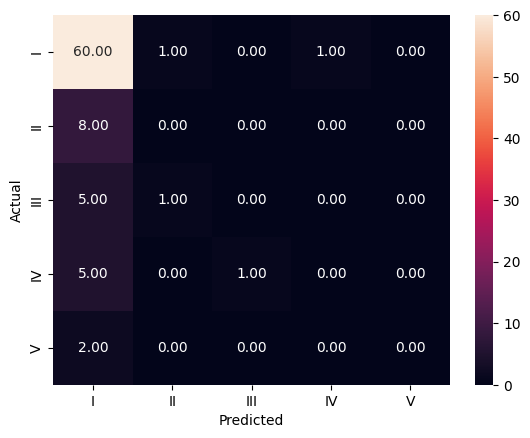

              precision    recall  f1-score   support

           0       0.75      0.97      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.71        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.55      0.71      0.62        84



/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Method  Train Accuracy  Test Accuracy  \
1  Logistic Regression without Sampling        0.754491       0.714286   

   Precision    Recall  F1-Score  Multi-Class Logloss  
1   0.553571  0.714286  0.623742             0.885927

In [110]:
# logistic regression

# For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss; 'liblinear' is limited to one-versus-rest schemes.

resultsDf = pd.DataFrame()

# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
resultsDf = train_test_model(lr, 'Logistic Regression without Sampling', X_train, X_test, y_train, y_test, 'none', 1, 'no', 'yes', 'no')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



RandomForestClassifier(n_estimators=10, random_state=1)
***************************************************************************


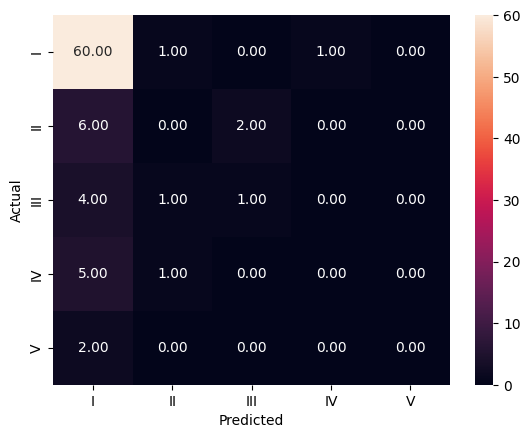

              precision    recall  f1-score   support

           0       0.78      0.97      0.86        62
           1       0.00      0.00      0.00         8
           2       0.33      0.17      0.22         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.73        84
   macro avg       0.22      0.23      0.22        84
weighted avg       0.60      0.73      0.65        84



/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Method  Train Accuracy  Test Accuracy  \
1  Logistic Regression without Sampling        0.754491       0.714286   
2      Random Forest with original data        0.961078       0.726190   

   Precision    Recall  F1-Score  Multi-Class Logloss  
1   0.553571  0.714286  0.623742             0.885927  
2   0.598949  0.726190  0.653078             3.026873

In [111]:
# Building a Random Forest Classifier on Training set
rfc_model = RandomForestClassifier(n_estimators=10, random_state=1)

# Train and Test the model
rf_df = train_test_model(rfc_model, 'Random Forest with original data', X_train, X_test, y_train, y_test, 'none', 2, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,rf_df])
resultsDf


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


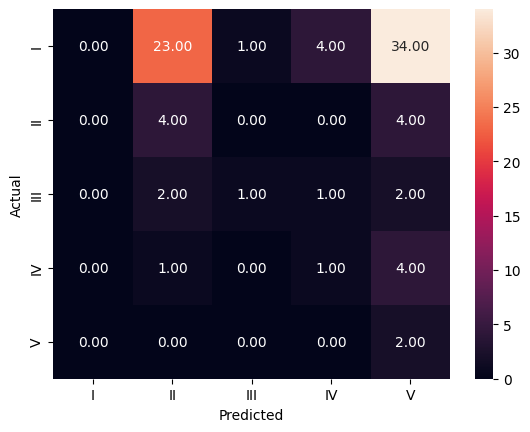

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.13      0.50      0.21         8
           2       0.50      0.17      0.25         6
           3       0.17      0.17      0.17         6
           4       0.04      1.00      0.08         2

    accuracy                           0.10        84
   macro avg       0.17      0.37      0.14        84
weighted avg       0.06      0.10      0.05        84



/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Method  Train Accuracy  Test Accuracy  \
1  Logistic Regression without Sampling        0.754491       0.714286   
2      Random Forest with original data        0.961078       0.726190   
3     Logistic Regression with Sampling        0.459109       0.095238   

   Precision    Recall  F1-Score  Multi-Class Logloss  
1   0.553571  0.714286  0.623742             0.885927  
2   0.598949  0.726190  0.653078             3.026873  
3   0.061353  0.095238  0.051796             2.255943

In [112]:
# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
lr_df = train_test_model(lr, 'Logistic Regression with Sampling', X_train_up, X_test, y_train_up, y_test, 'none', 3, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,lr_df])
resultsDf


In [113]:
# Building a Linear Regression model
# lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                  
    
# # Train and Test the model
# lr_smote_df = train_test_model(lr, 'Logistic Regression with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 4, 'no', 'yes', 'no')

# #Store the accuracy results for each model in a dataframe for final comparison
# resultsDf = pd.concat([resultsDf,lr_smote_df])
# resultsDf


In [114]:
# !pip install catboost

# from catboost import CatBoostClassifier

# Train and Test all models with Lasso interaction terms
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(X_train.isnull().sum().any())
print(X_test.isnull().sum().any())
print(y_train.isnull().sum().any())
print(y_test.isnull().sum().any())


# x_train = X_train[numeric_columns].T
# x_t = X_test[numeric_columns].T
# y_tr = y_train[numeric_columns].T
# y_te = y_test[numeric_columns].T
train_test_allmodels(X_train, X_test, y_train, y_test, 'no')

# all_train_model = train_test_allmodels(X_train, X_test, y_train, y_test, 'no')

# #Store the accuracy results for each model in a dataframe for final comparison
# all_train_modeldf = pd.concat([resultsDf,all_train_model])
# all_train_modeldf

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



(334, 83)
(84, 83)
(334,)
(84,)
False
False
False
False
111111111111111111111111111111111111

22222222222222222222222222222

classifier::
 LogisticRegression LogisticRegression(multi_class='multinomial', random_state=1)
2432656464656455454545455555555555555

resultsDf_commonresultsDf_commonresultsDf_commonresultsDf_commonresultsDf_common

classifier::
 RidgeClassifier RidgeClassifier(random_state=1)
2432656464656455454545455555555555555

resultsDf_commonresultsDf_commonresultsDf_commonresultsDf_commonresultsDf_common

classifier::
 SVC SVC(probability=True)


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



2432656464656455454545455555555555555

resultsDf_commonresultsDf_commonresultsDf_commonresultsDf_commonresultsDf_common

classifier::
 DecisionTreeClassifier DecisionTreeClassifier(random_state=1)
2432656464656455454545455555555555555

resultsDf_commonresultsDf_commonresultsDf_commonresultsDf_commonresultsDf_common

classifier::
 BaggingClassifier BaggingClassifier(max_samples=0.75, n_estimators=30, oob_score=True,
                  random_state=1)


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



2432656464656455454545455555555555555

resultsDf_commonresultsDf_commonresultsDf_commonresultsDf_commonresultsDf_common

classifier::
 AdaBoostClassifier AdaBoostClassifier(learning_rate=0.25, n_estimators=100, random_state=1)


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



2432656464656455454545455555555555555

resultsDf_commonresultsDf_commonresultsDf_commonresultsDf_commonresultsDf_common

classifier::
 LGBMClassifier LGBMClassifier(metric='multi_logloss', objective='multiclass', random_state=1)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 31
[LightGBM] [Info] Start training from score -0.301753
[LightGBM] [Info] Start training from score -2.345405
[LightGBM] [Info] Start training from score -2.592265
[LightGBM] [Info] Start training from score -2.633087
[LightGBM] [Info] Start training from score -4.019382
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/xgboost/data.py:

2432656464656455454545455555555555555

resultsDf_commonresultsDf_commonresultsDf_commonresultsDf_commonresultsDf_common

                   Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1      LogisticRegression        0.754491       0.714286   0.553571  0.714286   
2         RidgeClassifier        0.757485       0.726190   0.555850  0.726190   
3                     SVC        0.739521       0.738095   0.544785  0.738095   
4  DecisionTreeClassifier        0.994012       0.607143   0.597695  0.607143   
5       BaggingClassifier        0.958084       0.678571   0.546382  0.678571   
6      AdaBoostClassifier        0.739521       0.738095   0.551348  0.738095   
7          LGBMClassifier        0.991018       0.750000   0.649373  0.750000   
8           XGBClassifier        0.805389       0.714286   0.594017  0.714286   

   F1-Score  Multi-Class Logloss  
1  0.623742             0.885927  
2  0.629704             1.000000  
3  0.626875             0.907739  
4  0.6023

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/xgboost/data.py:336: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning:

is_sparse is deprecated

Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1      LogisticRegression        0.754491       0.714286   0.553571  0.714286   
2         RidgeClassifier        0.757485       0.726190   0.555850  0.726190   
3                     SVC        0.739521       0.738095   0.544785  0.738095   
4  DecisionTreeClassifier        0.994012       0.607143   0.597695  0.607143   
5       BaggingClassifier        0.958084       0.678571   0.546382  0.678571   
6      AdaBoostClassifier        0.739521       0.738095   0.551348  0.738095   
7          LGBMClassifier        0.991018       0.750000   0.649373  0.750000   
8           XGBClassifier        0.805389       0.714286   0.594017  0.714286   

   F1-Score  Multi-Class Logloss  
1  0.623742             0.885927  
2  0.629704             1.000000  
3  0.626875             0.907739  
4  0.602381            13.577057  
5  0.605344             1.982418  
6  0.631199             1.353537  
7  0.688220             1.166129  
8  0.639966             0.863117

In [115]:
# Train and Test all models with Lasso interaction terms
train_test_allmodels(X_train_up, X_test, y_train_up, y_test, 'no')

111111111111111111111111111111111111

22222222222222222222222222222

classifier::
 LogisticRegression LogisticRegression(multi_class='multinomial', random_state=1)
2432656464656455454545455555555555555

resultsDf_commonresultsDf_commonresultsDf_commonresultsDf_commonresultsDf_common

classifier::
 RidgeClassifier RidgeClassifier(random_state=1)
2432656464656455454545455555555555555

resultsDf_commonresultsDf_commonresultsDf_commonresultsDf_commonresultsDf_common

classifier::
 SVC SVC(probability=True)


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter

2432656464656455454545455555555555555

resultsDf_commonresultsDf_commonresultsDf_commonresultsDf_commonresultsDf_common

classifier::
 DecisionTreeClassifier DecisionTreeClassifier(random_state=1)
2432656464656455454545455555555555555

resultsDf_commonresultsDf_commonresultsDf_commonresultsDf_commonresultsDf_common

classifier::
 BaggingClassifier BaggingClassifier(max_samples=0.75, n_estimators=30, oob_score=True,
                  random_state=1)


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



2432656464656455454545455555555555555

resultsDf_commonresultsDf_commonresultsDf_commonresultsDf_commonresultsDf_common

classifier::
 AdaBoostClassifier AdaBoostClassifier(learning_rate=0.25, n_estimators=100, random_state=1)


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



2432656464656455454545455555555555555

resultsDf_commonresultsDf_commonresultsDf_commonresultsDf_commonresultsDf_common

classifier::
 LGBMClassifier LGBMClassifier(metric='multi_logloss', objective='multiclass', random_state=1)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 516
[LightGBM] [Info] Number of data points in the train set: 1235, number of used features: 54
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/xgboost/data.py:

2432656464656455454545455555555555555

resultsDf_commonresultsDf_commonresultsDf_commonresultsDf_commonresultsDf_common

                   Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1      LogisticRegression        0.459109       0.095238   0.061353  0.095238   
2         RidgeClassifier        0.793522       0.738095   0.544785  0.738095   
3                     SVC        0.247773       0.071429   0.005102  0.071429   
4  DecisionTreeClassifier        0.998381       0.547619   0.609347  0.547619   
5       BaggingClassifier        0.998381       0.714286   0.584601  0.714286   
6      AdaBoostClassifier        0.424291       0.583333   0.660952  0.583333   
7          LGBMClassifier        0.998381       0.738095   0.614453  0.738095   
8           XGBClassifier        0.990283       0.654762   0.588222  0.654762   

   F1-Score  Multi-Class Logloss  
1  0.051796             2.255943  
2  0.626875             1.000000  
3  0.009524             1.636982  
4  0.5718

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/xgboost/data.py:336: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning:

is_sparse is deprecated

Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1      LogisticRegression        0.459109       0.095238   0.061353  0.095238   
2         RidgeClassifier        0.793522       0.738095   0.544785  0.738095   
3                     SVC        0.247773       0.071429   0.005102  0.071429   
4  DecisionTreeClassifier        0.998381       0.547619   0.609347  0.547619   
5       BaggingClassifier        0.998381       0.714286   0.584601  0.714286   
6      AdaBoostClassifier        0.424291       0.583333   0.660952  0.583333   
7          LGBMClassifier        0.998381       0.738095   0.614453  0.738095   
8           XGBClassifier        0.990283       0.654762   0.588222  0.654762   

   F1-Score  Multi-Class Logloss  
1  0.051796             2.255943  
2  0.626875             1.000000  
3  0.009524             1.636982  
4  0.571839            15.624685  
5  0.641236             2.334871  
6  0.601698             1.410829  
7  0.669033             1.586981  
8  0.619710             0.938949

In [117]:
# define regressor models
models=[['LogisticRegression',LogisticRegression()],
    ['Ridge',RidgeClassifier()],
    ['KNeighborsClassifier',KNeighborsClassifier()],
    ['SVC',SVC()],
    ['RandomForestClassifier',RandomForestClassifier()],
    ['BaggingClassifier',BaggingClassifier()],
#     ['ExtraTreesClassifier',ExtraTreesClassifier()],
    ['AdaBoostClassifier',AdaBoostClassifier()],
    ['GradientBoostingClassifier',GradientBoostingClassifier()],
#     ['CatBoostClassifier',CatBoostClassifier(verbose=False)],
    ['LGBMClassifier',LGBMClassifier(verbose=False)],
    ['XGBClassifier',XGBClassifier()]
]

# define model parameters

lr_param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 'penalty': ['l2'],
                 #'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                 'C': [100, 10, 1.0, 0.1, 0.01]}
                 #'class_weight':['none','balanced'],
                 #'multi_class':['ovr', 'multinomial']}
ridge_param_grid = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    'class_weight':['none','balanced'],
                    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
lasso_param_grid = {'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]}
knn_param_grid = {'n_neighbors': range(3, 21, 2),
                 'weights': ['uniform', 'distance'],
                 'metric': ['euclidean', 'manhattan', 'minkowski']}
svc_param_grid = {'kernel': ['poly', 'rbf', 'sigmoid'],
                 'C': [50, 10, 1.0, 0.1, 0.01],
                 'gamma': ['scale'],
                 'decision_function_shape': ['ovo', 'ovr']}
rf_param_grid = {
    'n_estimators': [10, 100, 1000],
    'max_features': [1, 0.5, 'sqrt', 'log2', None]
    # 'class_weight': ['balanced', 'balanced_subsample', None]
}

# rf_param_grid = {'n_estimators': [10, 100, 1000],
#                  'max_features': ['auto', 'sqrt', 'log2']}              
                 #'class_weight':['balanced','balanced_subsample','none']}
bag_param_grid = {'n_estimators': [10, 100, 1000],
                 'max_samples': np.arange(0.7, 0.8, 0.05)}
et_param_grid = {'n_estimators': np.arange(10,100,10),
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'min_samples_split': np.arange(2,15,1)}
                 #'class_weight':['balanced','balanced_subsample','none']}
adb_param_grid = {'n_estimators': np.arange(30,100,10),
                 'learning_rate': np.arange(0.1,1,0.5)}
gb_param_grid = {'n_estimators': [10, 50, 100, 500],
                 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                 'subsample':[0.5, 0.7, 1.0],
                 'max_depth': [3, 7, 9]}
catb_param_grid = {'task_type': 'GPU','depth': [4, 7, 10],
                  'learning_rate' : [0.03, 0.1, 0.15],
                  'l2_leaf_reg': [1,4,9],
                  'early_stopping_rounds':[50],
                  'iterations': [300],
                  'loss_function':['MultiClass']}
lightgbm_param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                  'n_estimators': [10, 50, 100, 500, 1000, 5000],
                  'min_child_samples': sp_randint(100, 500), 
                  'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
                  'boosting_type':['gbdt', 'dart', 'goss'],
                  'bagging_fraction': (0.5, 1),
                  'bagging_frequency' : (5, 8),
                  'feature_fraction': (0.5, 0.8),
                  'max_depth': (10, 13),
                  'min_data_in_leaf': (90, 120),
                  'num_leaves':(1200, 1550),
                  'metric': ['multi_logloss'],
                  'objective': ['multiclass'],
                  'num_class': [5],
                  'early_stopping_rounds':[50],
                  'verbosity':[1]}
xgb_param_grid = {'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
                  'max_depth' : [3, 4, 5, 6, 8, 10, 12, 15],
                  'min_child_weight': [ 1, 3, 5, 7],
                  'gamma': [0.0, 0.1, 0.2 , 0.3, 0.4],
                  'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7],
                  'objective': ['multi:softmax'],
                  'eval_metric': ['mlogloss'],
                  'num_class': [5]}

for name, classifier in models:
    if name == 'LogisticRegression':
        lr_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, lr_param_grid)
    elif name == 'Ridge':
        ridge_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, lasso_param_grid)
    elif name == 'KNeighborsClassifier':
        knn_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, knn_param_grid)
    elif name == 'SVC':
        svc_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, svc_param_grid)
    elif name == 'RandomForestClassifier':
        rf_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, rf_param_grid)
    elif name == 'BaggingClassifier':
        bag_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, bag_param_grid)
    elif name == 'ExtraTreesClassifier':
        et_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, et_param_grid)
    elif name == 'AdaBoostClassifier':
        adb_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, adb_param_grid)
    elif name == 'GradientBoostingClassifier':
        gb_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, gb_param_grid)
    elif name == 'CatBoostClassifier':
        catb_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, catb_param_grid)
    elif name == 'LGBMClassifier':
        lightgbm_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, lightgbm_param_grid)
    elif name == 'XGBClassifier':
        xgb_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, xgb_param_grid)


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning:

The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anac

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown 

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anac

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anac

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bheema.ujwala/anac

Best F1_Score: -0.903155 using {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
-0.903155 (0.061285) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
95% Confidence interval range: (-1.0257 %, -0.7806 %)
Total duration 6.6819117069244385 



/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning:

The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_valid

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 344, in _score
    response_method = _check_response_method(estimator, self._response_method)
    

AttributeError: RidgeClassifier has none of the following attributes: predict_proba.

  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", 

Best F1_Score: 0.000000 using {'alpha': 0.02}
0.000000 (0.000000) with: {'alpha': 0.02}
95% Confidence interval range: (0.0000 %, 0.0000 %)
Total duration 0.4451940059661865 

Best F1_Score: -2.051050 using {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
-2.051050 (0.993259) with: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
95% Confidence interval range: (-4.0376 %, -0.0645 %)
Total duration 2.5018742084503174 



/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning:

The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_valid

             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 344, in _score
    response_method = _check_response_method(estimator, self._response_method)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 2022, in _check_response_method
    raise AttributeError(
AttributeError: SVC has none of the following attributes: predict_proba.

  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scor

                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 2022, in _check_response_method
    raise AttributeError(
AttributeError: SVC has none of the following attributes: predict_proba.

  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 344, in _score
    response_method = _check_response_method(estimator, self._response_method)
    

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 344, in _score
    response_method = _check_response_method(estimator, self._response_method)
    

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 344, in _score
    response_method = _check_response_method(estimator, self._response_method)
    

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 344, in _score
    response_method = _check_response_method(estimator, self._response_method)
    

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 344, in _score
    response_method = _check_response_method(estimator, self._response_method)
    

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 344, in _score
    response_method = _check_response_method(estimator, self._response_method)
    

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 344, in _score
    response_method = _check_response_method(estimator, self._response_method)
    

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 344, in _score
    response_method = _check_response_method(estimator, self._response_method)
    

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 344, in _score
    response_method = _check_response_method(estimator, self._response_method)
    

                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 2022, in _check_response_method
    raise AttributeError(
AttributeError: SVC has none of the following attributes: predict_proba.

  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_

Best F1_Score: 0.000000 using {'C': 50, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly'}
0.000000 (0.000000) with: {'C': 50, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly'}
95% Confidence interval range: (0.0000 %, 0.0000 %)
Total duration 2.5803110599517822 

Best F1_Score: -1.006456 using {'max_features': 1, 'n_estimators': 1000}
-1.006456 (0.194047) with: {'max_features': 1, 'n_estimators': 1000}
95% Confidence interval range: (-1.3946 %, -0.6184 %)
Total duration 92.05174803733826 



/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning:

The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.



Best F1_Score: -1.323702 using {'max_samples': 0.75, 'n_estimators': 1000}
-1.323702 (0.511002) with: {'max_samples': 0.75, 'n_estimators': 1000}
95% Confidence interval range: (-2.3457 %, -0.3017 %)
Total duration 102.78826212882996 



/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning:

The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boost

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

Best F1_Score: -1.139973 using {'learning_rate': 0.1, 'n_estimators': 30}
-1.139973 (0.055812) with: {'learning_rate': 0.1, 'n_estimators': 30}
95% Confidence interval range: (-1.2516 %, -1.0283 %)
Total duration 14.016961812973022 



KeyboardInterrupt: 

In [118]:
ind_feat_df.drop(['Accident Level','Potential Accident Level'], axis = 1, inplace=True) # Considering all Predictors

# Consider only top 30 GLOVE features
ind_feat_df = ind_feat_df.join(y.reset_index(drop=True))
ind_feat_df.head(2)


year  month  day  Country_02  Country_03  Local_02  Local_03  Local_04  \
0  2016      1    1       False       False     False     False     False   
1  2016      1    2        True       False      True     False     False   

   Local_05  Local_06  ...  TFIDF_described time accident  \
0     False     False  ...                            0.0   
1     False     False  ...                            0.0   

   TFIDF_finger left hand  TFIDF_finger right hand  \
0                     0.0                      0.0   
1                     0.0                      0.0   

   TFIDF_generating described injury  TFIDF_hand causing injury  \
0                                0.0                        0.0   
1                                0.0                        0.0   

   TFIDF_injury time accident  TFIDF_left hand causing  \
0                         0.0                      0.0   
1                         0.0                      0.0   

   TFIDF_right hand causing  TFIDF_time accident employee  Accident Level  
0                       0.0                           0.0               0  
1                       0.0                           0.0               0  

[2 rows x 84 columns]